<a href="https://colab.research.google.com/github/paresh1807/Unsupervised--ML/blob/main/Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

we have given a transactional dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 having 541909 data records and 8 features.Our task is to identify major customer segments on the basis of this transaction dataset which will have a positive impact on business.

The initial step of the project was to gather and preprocess the data by addressing missing values and outliers. We also performed data type conversion to facilitate visualization. Subsequently, we conducted a thorough exploratory data analysis by creating various plots such as univariate and bivariate graphs. This approach allowed us to extract valuable insights that informed our subsequent decisions regarding the machine learning model pipeline.

After completing initial data exploration, we performed feature engineering and data preprocessing to extract new features like Recency, Frequency and Monetary from the given features.we have clubbed these new features with customerID to form a new dataframe so that it will reduce the data dimensionality and also got RFM score with the help of recency, frequency and monetary values by virtue of which we can segment the customers or we can do clustering on the basis of these features and scores.

After Achieving new features we did log transformation to make the data normalized for further analysis. As the data is normalised now, we have performed K-Means clustering and with the help of clustering analysis,silhouette score and elbow curve we have came up with the optimal number of cluster as 4. I have then clubbed the optimal cluster label to recency, frequency and monetary dataframe for cluster based modelling.

After splitting and standardizing the data, we proceeded to apply various machine learning algorithms. The algorithms we experimented with included Logistic Regression, Random Forest, and XGBoost.

The model evaluation process involved comparing the performance of different algorithms using metrics such as confusion matrix, recall, precision, f1 score, accuracy and auc_roc score. After tinkering with various machine learning algorithms and carefully observing the evaluation metrics we have found our best performing model i.e. XGBOOST(untuned) with an accuracy of 97% and AUC_ROC Score of 99.9% which shows a very high discriminative power of our model to differentiate between the clusters. Monetary feature is contributing utmost as per selected model which is folloed by frequency and recency and it helps our selected model to make better predictions.  

# **GitHub Link -**

https://github.com/paresh1807/Unsupervised--ML

# **Problem Statement**


In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing all neccessary Libraries
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
## Mounting google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Creating path for the dataset
df= '/content/drive/MyDrive/Online Retail.xlsx - Online Retail.csv'
df_retail= pd.read_csv(df)

### Dataset First View

In [ ]:
# viewing the first five records
df_retail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# viewing the last five records
df_retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_retail.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_retail.duplicated().sum()

5268

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Creating a function for checking missing values.
def mdF():
    total_no = df_retail.isnull().sum()
    missing_percentage = (df_retail.isnull().sum()/len(df_retail))*100
    mdF = pd.concat([total_no, missing_percentage], keys=['Missing_Values', 'Missing_Percentage'], axis=1)
    return mdF[mdF['Missing_Values'] > 1]

In [ ]:
mdF()

,Missing_Values,Missing_Percentage
Description,1454,0.268311
CustomerID,135080,24.926694


In [ ]:
# Total count of missing values
df_retail.isnull().sum().sum()

136534

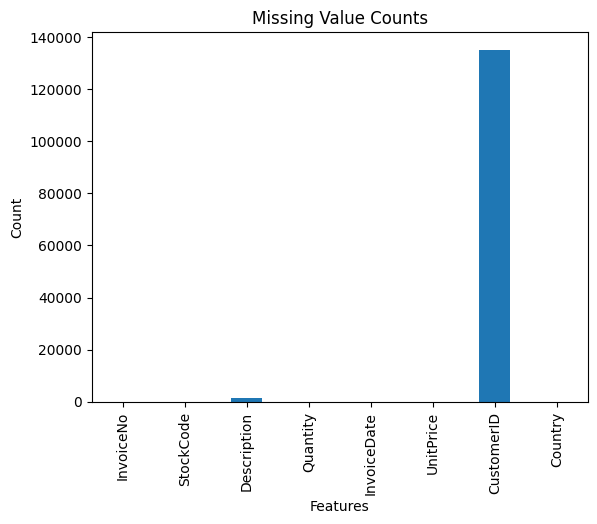

In [ ]:
# Visualizing the missing values
null_counts= df_retail.isnull().sum()
null_counts.plot.bar()
plt.title('Missing Value Counts')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

### What did you know about your dataset?

Dataset is from UK based non-store online retail having all transactions occuring between 01/12/2010 to 09/12/2011 containing 541909 records and 8 features that includes 'Invoice no', 'Description', 'StockCode', 'Quantity', 'Invoice Date', 'UnitPrice', 'CustomerID', 'Country'.Our dataset has total 5268 duplicate values and 136534 missing values.Features contributing in missing values are 'CustomerID' and 'Description' having 135080 missing values in CustomerID that is 25% of our dataset and 1454 missing values in Description that is 0.26% of our dataset.  

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
# It gives the Statistical Information about the numeric column.
df_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

There are 541909 rows and 8 columns/features in the dataset whose description are as follows-



* *InvoiceNO.-* Integral number uniquely assigned to each transaction having 6-digits and if its code start with letter 'C' it shows cancellation.

* *StockCode-* Integral number uniquely assigned to each distinct product having 5-digits(Product Code).


* *Description-* It shows the Product name.
* *Quantity-* The quantities of each product (item) per transaction.

* *InvoiceDate-* It shows the the date and time when each transaction was generated.
* *UnitPrice-* It shows the per unit price of product.


* *CustomerID-* Integral number uniquely assigned to each customer having 5-digits.

* *Country-* It shows the country name from where the order has been placed.













### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df_retail.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

### Handling Duplicate Values

In [ ]:
# First copying the data to maintain the originality of data.
df_retail_1=df_retail.copy()

In [ ]:
# Drop Duplicated rows of data from the DataFrame.
print("*"*75)
print("Length of DataFrame with duplicate values : ", len(df_retail_1))
df_retail_1.drop_duplicates(inplace=True, keep='first')
print("*"*75)
print("Length of DataFrame after dropping all the duplicate values : ", len(df_retail_1))
print("*"*75)

***************************************************************************
Length of DataFrame with duplicate values :  541909
***************************************************************************
Length of DataFrame after dropping all the duplicate values :  536641
***************************************************************************


### Handling Missing Values

In [ ]:
# Drop the entries where both the CustomerID and Description are null values.
df_retail_1.drop(index=df_retail_1[df_retail_1['CustomerID'].isna() & df_retail_1['Description'].isna()].index, inplace=True)

In [ ]:
#Dropping the null values from customerID column.
# we can't proceed with null values in customerID column as it is one of the main feature to identify customer category.
df_retail_1.dropna(inplace=True)

In [ ]:
# Crossverifying that null values are handled.
df_retail_1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# checking the information of data after dropping null and duplicate values.
df_retail_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [ ]:
# Shape of data after dropping null and duplicate values
df_retail_1.shape

(401604, 8)

In [ ]:
df_retail_1[df_retail_1['Quantity']<0] # checking the cancelled order and obviously they have Quantity less than zero.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [ ]:
# Checking the unit price if it is equal to zero because such data is errorneous.
df_retail_1[df_retail_1['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom


*As we have observed the above two code snippets which tells us about the order cancellation and unit price of product which is equal to zero and it shows the errorneous data which have to be eradicated for further analysis as these data records are **outliers** which will create hindrance in data analysis process.*

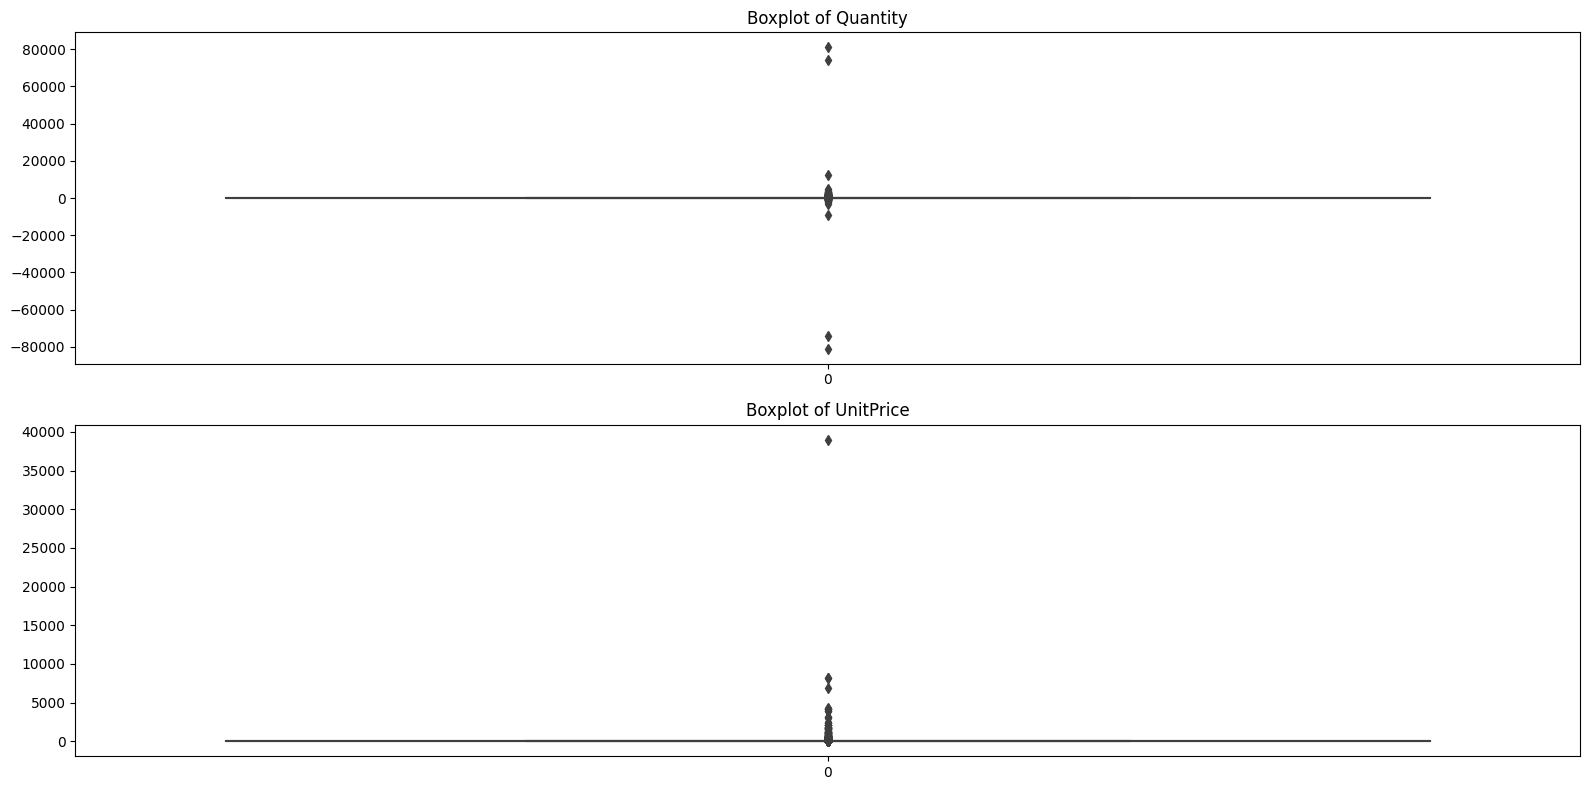

In [ ]:
# Visualizing the outliers with the help of box plot.
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
sns.boxplot(df_retail_1['Quantity'])
plt.title('Boxplot of Quantity')

plt.subplot(2, 1, 2)
sns.boxplot(df_retail_1['UnitPrice'])
plt.title('Boxplot of UnitPrice')

plt.tight_layout()
plt.show()

In [ ]:
# Grabbing the data records which is free from outliers.
df_retail_1 = df_retail_1[df_retail_1['Quantity'] > 0]
df_retail_1 = df_retail_1[df_retail_1['UnitPrice'] > 0]
print("Length of Dataframe is : ",len(df_retail_1))

Length of Dataframe is :  392692


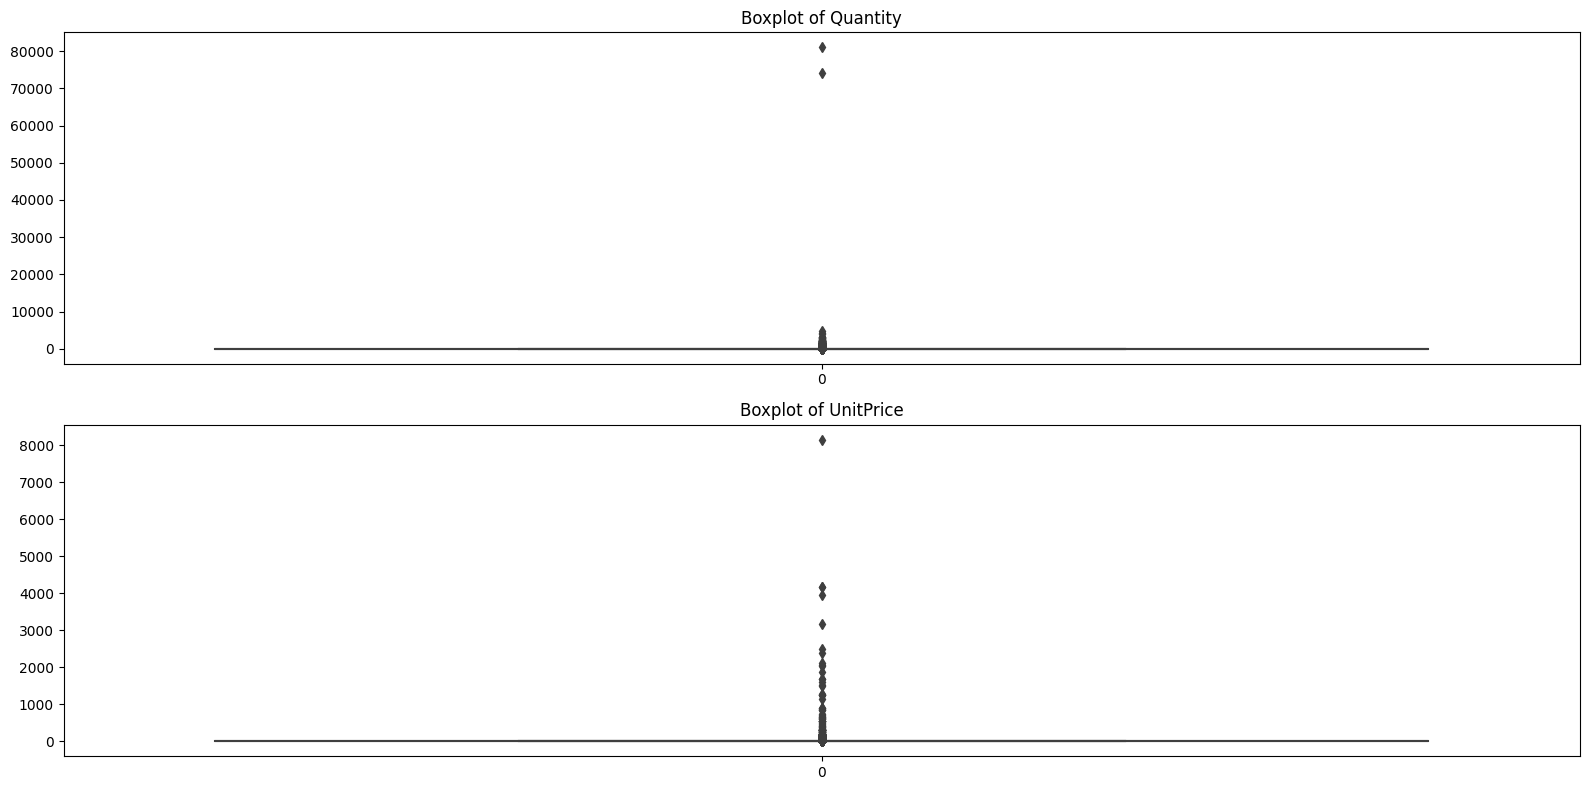

In [ ]:
# Again visualizing data which is now free from outliers.
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
sns.boxplot(df_retail_1['Quantity'])
plt.title('Boxplot of Quantity')

plt.subplot(2, 1, 2)
sns.boxplot(df_retail_1['UnitPrice'])
plt.title('Boxplot of UnitPrice')

plt.tight_layout()
plt.show()

In [ ]:
# Checking the information of data after cleansing.
df_retail_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.0+ MB


In [ ]:
# checking the shape of data after cleansing.
df_retail_1.shape

(392692, 8)

In [ ]:
# Checking the stats of data after cleansing.
df_retail_1.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


### Data Manipulation

In [ ]:
# Making new feature with the help of Quantity and UnitPrice.
df_retail_1['Total_Price'] = df_retail_1['Quantity']*df_retail_1['UnitPrice']

In [ ]:
#converting InvoiceDate to datetime format.
df_retail_1['InvoiceDate'] = pd.to_datetime(df_retail_1['InvoiceDate'], format = "%m/%d/%y %H:%M")

In [ ]:
# Now Decoding the InvoiceDate feature to extract New Feature.
year = df_retail_1['InvoiceDate'].apply(lambda x: x.year)
month = df_retail_1['InvoiceDate'].apply(lambda x: x.month)
weekday = df_retail_1['InvoiceDate'].apply(lambda x: x.weekday())
time_hr = df_retail_1['InvoiceDate'].apply(lambda x: x.time().hour)
minutes_hr = df_retail_1['InvoiceDate'].apply(lambda x: x.time().minute)

In [ ]:
# checking the length of all decoded features.
len(year), len(month), len(weekday), len(time_hr), len(minutes_hr)

(392692, 392692, 392692, 392692, 392692)

In [ ]:
#converting Month no. to Month name.
monthDict={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
month = month.map(monthDict)

In [ ]:
#converting Week no. to week day.
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday = weekday.map(day)

In [ ]:
# Creating function to Seperate morning,afternoon and evening hours.
def Period(x):
    if 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16<= x <= 20:
        return 'Evening'

In [ ]:
#converting to year month weekday and time
df_retail_1['Year'] = year
df_retail_1['Month'] = month
df_retail_1['WeekDay'] = weekday
df_retail_1['TimePeriod'] = time_hr
df_retail_1['TimePeriod'] = df_retail_1['TimePeriod'].apply(lambda x: Period(x))

In [ ]:
# Visualizing dataframe with the new created features.
df_retail_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year,Month,WeekDay,TimePeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,Morning


In [ ]:
# Visualizing the stats with new features having numerical features.
df_retail_1.describe()

,Quantity,UnitPrice,CustomerID,Total_Price,Year
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,22.631500,2010.934631
std,180.492832,22.241836,1713.539549,311.099224,0.247177
min,1.000000,0.001000,12346.000000,0.001000,2010.000000
25%,2.000000,1.250000,13955.000000,4.950000,2011.000000
50%,6.000000,1.950000,15150.000000,12.450000,2011.000000
75%,12.000000,3.750000,16791.000000,19.800000,2011.000000
max,80995.000000,8142.750000,18287.000000,168469.600000,2011.000000


In [ ]:
# Visualizing the stats of categorical features.
df_retail_1.describe(include=['O'])

,InvoiceNo,StockCode,Description,Country,Month,WeekDay,TimePeriod
count,392692,392692,392692,392692,392692,392692,392692
unique,18532,3665,3877,37,12,6,3
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,November,Thursday,Afternoon
freq,542,2023,2016,349203,63168,79243,231998


### What all manipulations have you done and insights you found?

our data has total 5268 duplicate values,so first I dropped the duplicate values and come up with the new shape of data that is 536641 data records and 8 features.Data also has missing values in CustomerID and Description column, so it is dropped as missing values in customerID and Description is of no use and again come up with new shape of data that is 401604 data records and 8 columns.

In our data we have some erroneous data records in our Quantity and UnitPrice Column (Like Quantity have negative records which means order cancellation and UnitPrice have price of zero for some of the products) which leads to misleading analysis of our data, so these errorneous data records are eradicated from our data and we have come up with the new shape of our data that is 392692 data records and 8 features.

In Data Manipulation process we have created new features like total_price, year, month, weekday and TimePeriod with the help of existing features like Quantity, UnitPrice and InvoiceDate. TimePeriod is divided into three categories that is Morning, Afternoon and evening which shows the transactions in the respective period of time. Finally we have come up with new shape of our data this 392692 data records and 13 features.

Insights we have come up with after cleansing and manipulate the data are-

1.) Product Description **WHITE HANGING HEART T-LIGHT HOLDER** has the highest frequency of occurrence in data[i.e. 2016 times] which means it is the most preferred product by customers.

2.) Most of transactions are made in **Afternoon** TimePeriod which have a frequency of 231998 times.

3.) Most of the transactions has the highest frequency of occurrence in data from **United Kingdom** country[i.e. 349203 times] and it is obvious because the transactional data we have belongs to UK-based non-store online retail.

4.) According to the Month, most of the transactions are made in the month of **November** and according to weekday, most of the transactions are made on **Thursday**.

5.) The **average** Quantity purchased comes out to be 13 units with Unitprice of 3.12 pounds having total price of 22.63 pounds for the products.

6.) The **maximum** Quantity which is purchased is 80995 units with highest unitprice of 8142.75 pounds having total price of 168469 pounds in year 2011.






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Customers Stats**

#### Chart - 1- Bar Plot( Top 30 Customers of our Retail Store according to Purchasing Power)

In [ ]:
## Initiating Variable for Top 30 Customers.
df_retail_1['CustomerID'] = df_retail_1['CustomerID'].apply(lambda x: int(x))
Top_30_customers = df_retail_1.groupby(by='CustomerID')['Total_Price'].sum().sort_values(ascending=False)[:30]

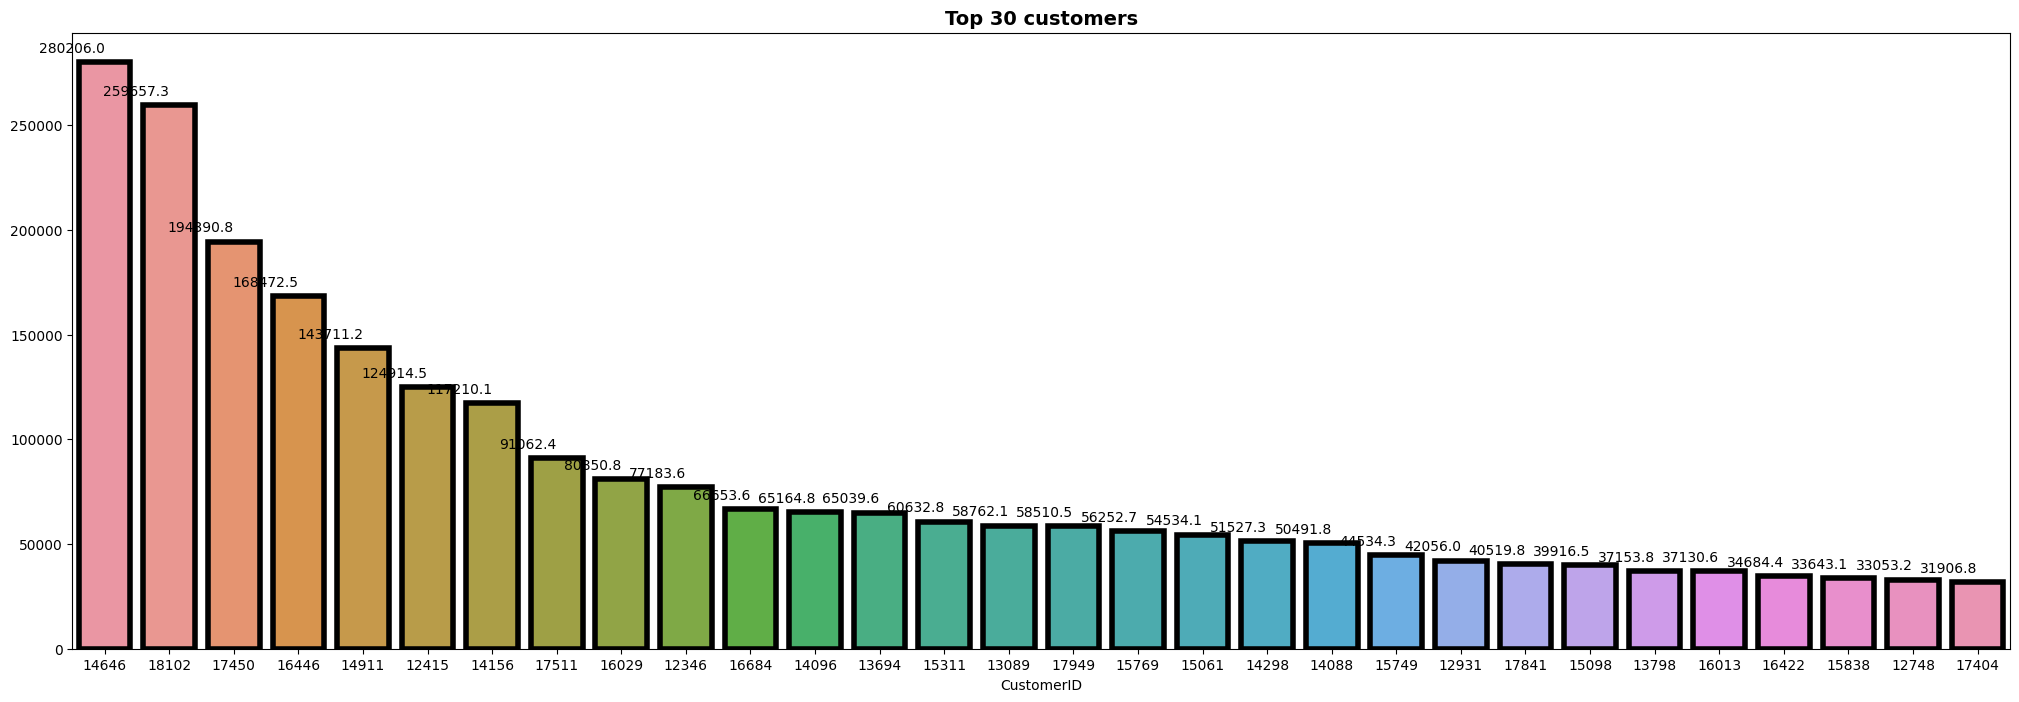

In [ ]:
## Visualization Code
plt.figure(figsize=(55,8))
plt.subplot(1,2,1)
ax=sns.barplot(x=Top_30_customers.index, y=Top_30_customers.values, order=Top_30_customers.index,lw=4,
               ec='black',hatch='')
plt.title("Top 30 customers", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

The above Plot shows the purchasing power of Top 30 customers of our Retail Store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the above plot have positive impact as it shows how much and upto what extent top customers can spent on the products and on the contrary when we compare the top most customer and last in the list there is significant difference but each and every customer's penny is valuable to us as it is sign of achievement for the company.

#### Chart - 2- Bar Plot and Pie Chart (Checking for Loyal Customers according to the Purchasing Quantity)

In [ ]:
# Initiating Variable for Loyal Customers
loyal_customers = df_retail_1.groupby(by='CustomerID')['Quantity'].sum().sort_values(ascending=False)

In [ ]:
loyal_customers.describe([.25,.60,.75,.90,.95,.99])

count      4338.000000
mean       1187.644537
std        5043.619654
min           1.000000
25%         159.000000
50%         378.000000
60%         537.200000
75%         989.750000
90%        2110.600000
95%        3570.900000
99%       11016.240000
max      196915.000000
Name: Quantity, dtype: float64



* *Customer loyalty is the act of choosing one company's products and services consistently over their competitors. When a customer is loyal to one company, they aren't easily swayed by price or availability. They would rather pay more and ensure the same quality, service & product they know.*
* *Since we don't have the purchase stats of our customers with the other companies, Let us seggregate them into 4 Categories based on thier purchases(Quantity Based) as Bronze, Silver, Gold and Platinum.*



In [ ]:
#Creating function to divide customers into Bronze, Silver, Gold and Platinum category.
def Loyalty(x):
    if x<500:
        return "Bronze"
    elif 500 <= x < 1000:
        return "Silver"
    elif 1000 <= x < 2000:
        return "Gold"
    elif x >= 2000:
        return "Platinum"

In [ ]:
#applying function
loyal_customers_categories = loyal_customers.apply(lambda x: Loyalty(x))

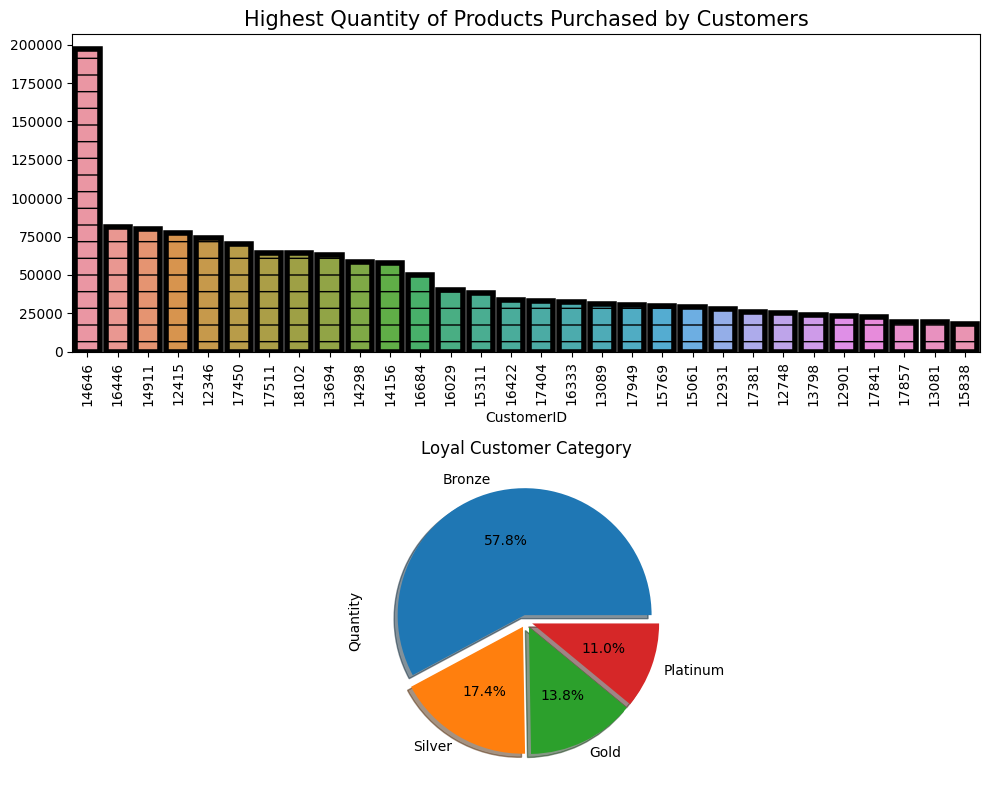

In [ ]:
# Visualization Code

# Plot the bar plot
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)

plt.xticks(rotation=90)
plt.title("Highest Quantity of Products Purchased by Customers", fontsize=15)
sns.barplot(x=loyal_customers[:30].index, y=loyal_customers[:30].values, order=loyal_customers[:30].index, lw=4, ec='black', hatch='-')

plt.subplot(2, 1, 2)

# Plot the pie chart
loyal_customers_categories.value_counts().plot.pie(figsize=(10, 8), legend=False, autopct='%1.1f%%', shadow=True, explode=(0.05, 0.05, 0.05,0.05), title='Loyal Customer Category')

# Display the combined plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

The main purpose of using pie chart is to indicates a part-to-whole relationship in our data. The portions of the graph are proportional to the fraction of the total in each and every category. The complete "pie" represents a hundred proportion of a whole, while at the same time, the pie "slices" signify portions of the whole. It shows the total coverages covered by Bronze, Silver, Gold and Platinum Class of Customers.

##### 2. What is/are the insight(s) found from the chart?

*From Bar Graph-* Bar graph shows the Top 30 customers according to the purchased quantity who had purchased the highest quantity of products as compare to remaining customers.CustomerID 14646 has purchased the highest quantity.

*From Pie Chart-* Pie chart shows the distribution of loyal customer catergory as Bronze, Silver, Gold and Platinum.Among all the categories Bronze category has the highest customer acquisition(58%) followed by silver, Gold and Platinum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, the gained insights help us to monitor the customer's categorization and we can make float new offers or discounts on products to acquire more customer in each category especially in gold and platinum class as it increases the monetary value.

#### Chart - 3- Bar Plot (Customers Who Buy Often, But Spend Very Little)

In [ ]:
# Initiating Variable for Regular Customers.
regular_customer= df_retail_1.groupby(by='CustomerID').agg(
    {"InvoiceNo" : "nunique","Total_Price" : 'sum'}).sort_values(by=['InvoiceNo', 'Total_Price'], ascending=[False, True])

In [ ]:
# Regular Customer Stats
regular_customer.describe([.25,.75,.90,.95,.99])

,InvoiceNo,Total_Price
count,4338.000000,4338.000000
mean,4.272015,2048.688081
std,7.697998,8985.230220
min,1.000000,3.750000
25%,1.000000,306.482500
50%,2.000000,668.570000
75%,5.000000,1660.597500
90%,9.000000,3640.841000
95%,13.000000,5789.999500
99%,30.000000,19780.487800


In [ ]:
# Considering 20,000(Total_Price) as base Price for regular customers as 99% of customers can spend upto 20,000.(Shown in regular customer stats.)
regular_customer = regular_customer[regular_customer['Total_Price'] < 20000]

<Axes: title={'center': 'Customers who buy often, but spent little'}, xlabel='CustomerID'>

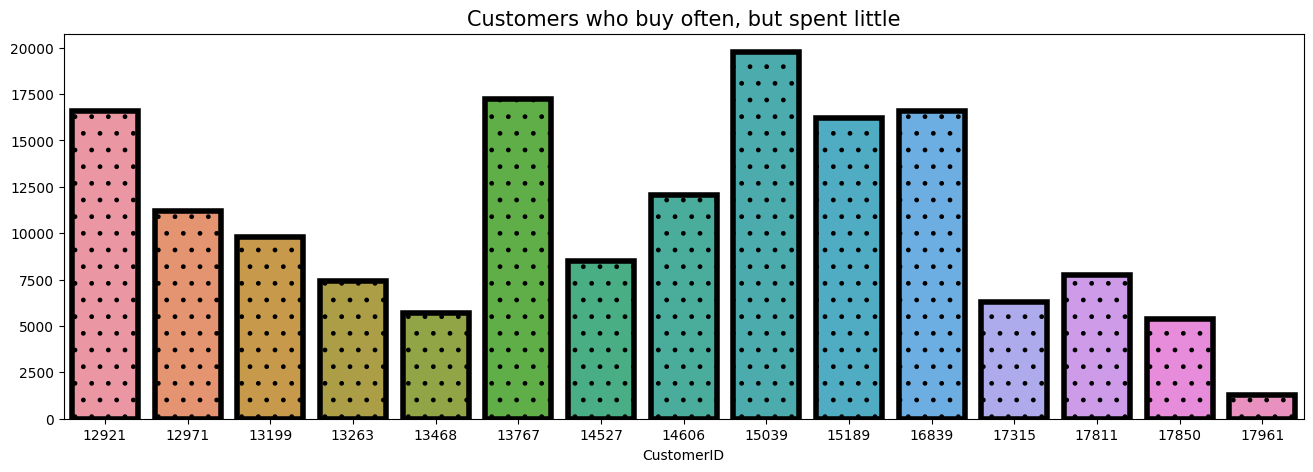

In [ ]:
# Visualization code
plt.figure(figsize=(16,5))
plt.title("Customers who buy often, but spent little", fontsize = 15)
sns.barplot(x=regular_customer['Total_Price'][:15].index,
            y=regular_customer['Total_Price'][:15].values,lw=4,
               ec='black',hatch='.')

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

 The above graph tells about the regularity of customers,how often they purchase and how much monetary value they add to our store.we must try to retain these customers as they are frequent at our store though they have threshold limit of purchasing power still each and every penny contribution is sign of success to us.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have created positive impact on business as it shows the most frequent customers who consistently purchased with a treshhold limit of there purchasing power and we must retain these customers as they are loyal to us and beacuse of them we will also get the mouth publicity that ultimately enhance our sales.

#### Chart - 4- Bar Plot ( Customers Whom We have Lost)

In [ ]:
# Chronological order of month.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_retail_1['Month'] = pd.Categorical(df_retail_1['Month'], categories=month_order, ordered=True)

In [ ]:
# First initiating variable for monthly customer count.
monthly_customers_2011 = df_retail_1[df_retail_1['Year'] == 2011].groupby('Month')['CustomerID'].nunique()

In [ ]:
monthly_customers_2011

Month
January       741
February      758
March         974
April         856
May          1056
June          991
July          949
August        935
September    1266
October      1364
November     1664
December      615
Name: CustomerID, dtype: int64

In [ ]:
# lost customers for each month.
lost_customers_monthwise = monthly_customers_2011.diff().fillna(0)

In [ ]:
lost_customers_monthwise

Month
January         0.0
February       17.0
March         216.0
April        -118.0
May           200.0
June          -65.0
July          -42.0
August        -14.0
September     331.0
October        98.0
November      300.0
December    -1049.0
Name: CustomerID, dtype: float64

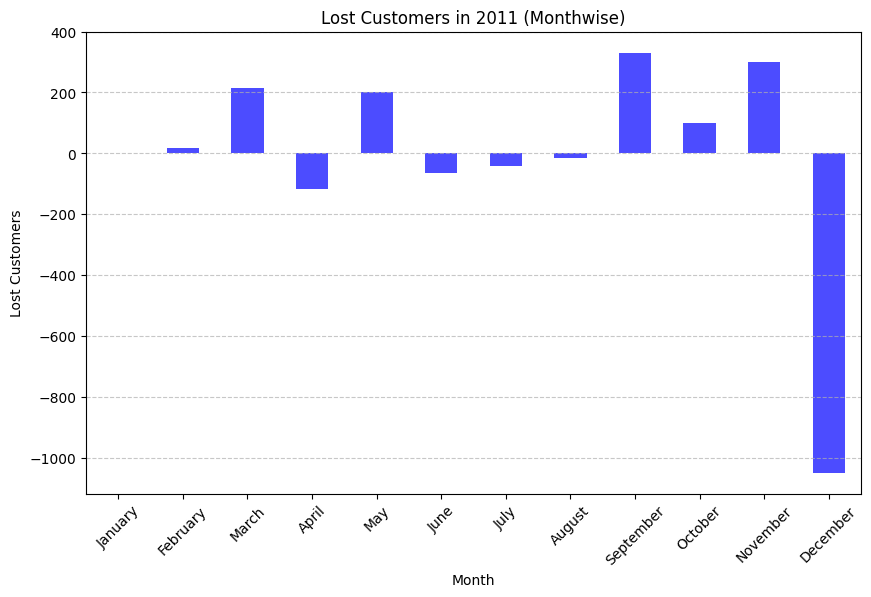

In [ ]:
# Visualization Code.
plt.figure(figsize=(10, 6))
lost_customers_monthwise.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Lost Customers in 2011 (Monthwise)')
plt.xlabel('Month')
plt.ylabel('Lost Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it very clear that most of the customers are lost in december month and this loss is cumulative as it is compare with the previous month customers. It is obvious to loose customer in december because from september to November we have festive months, so their is rush at the store and in december month we doesn't have any frequent chunks of festival except christmas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have a slightly negative impact on business as it shows the cumulative churn of customers month over month, mainly in December month as this month has the least frequency of festivals, so to retain customers we must float some offers or discounts on products or have winter sale on the products which is most preferred by the customers.

##**Periodical Stats**

#### Chart - 1- Bar Plot (Yearwise Purchasing Stats)

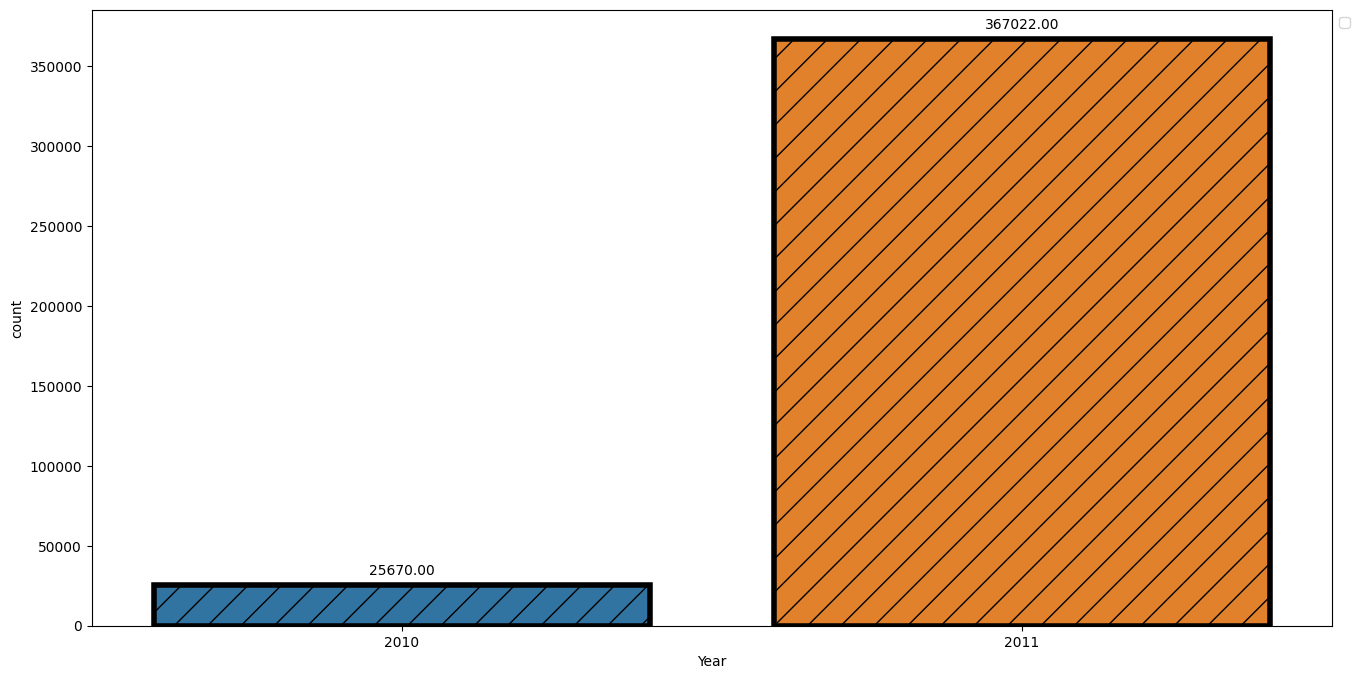

In [ ]:
# Visualization Code
# Filter the data for years 2010 and 2011
data_2010 = df_retail_1[df_retail_1['Year'] == 2010]
data_2011 = df_retail_1[df_retail_1['Year'] == 2011]

# Create the countplot
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Year', data=df_retail_1, lw=4, ec='black', hatch='/')

# Adding Annotation
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is evident that there is huge spike in the year 2011 and it is obvious because for the year 2010 we have only data of december month to compare it with the year 2011.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained has a positive outcome for business as it shows the maximum transactions records in year 2011 and it is obvious to have maximum records for the year 2011 as we have only december data for the year 2010.To be more precise we have to deep dive in 2011 data to crunch the numbers by months and weeks and see which month and weekday gives maximum monetary value,then it will have more positive impact on business.

#### Chart - 2- Bar Plot (Monthwise Purchasing Stats)

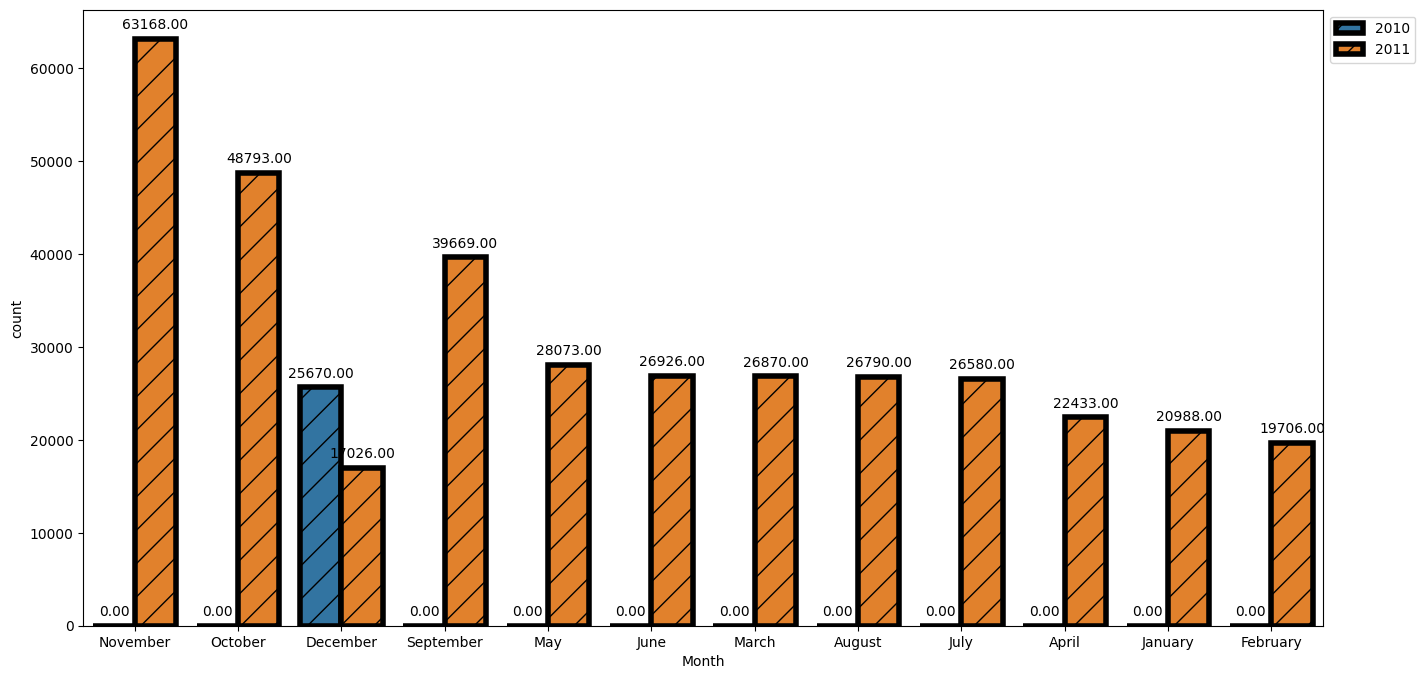

In [ ]:
# visualization code
plt.figure(figsize=(16,8))
ax=sns.countplot(x=df_retail_1['Month'], order=df_retail_1['Month'].value_counts().index, hue=df_retail_1['Year'],lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above the graph it is evident that maximum freqency of purchase occurred in november month which is followed by october and december of the year 2011.There is an interesting switch in the month of december of the year 2011 when it is compared to the december month of the year 2010 and it shows the maximum frequency of purchase occurred in december month of the year 2010.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have a positive impact on business as it shows maximum frequency of purchase from september to November and it is obvious because most the festivals occurred in these months and frequency of occurrence of festivals is in a continuous chain,so discounts and offers are also available on products which attracts the customers and attains maximum customer acquisition.But we must avail some membership plan to these customers to retain them throughout the year so the drastic drop which occurred in december month will not occurred and we will have constant customer acquisition rate in off seasons.

#### Chart - 3- Bar Plot( Weekday wise Purchasing Stats)

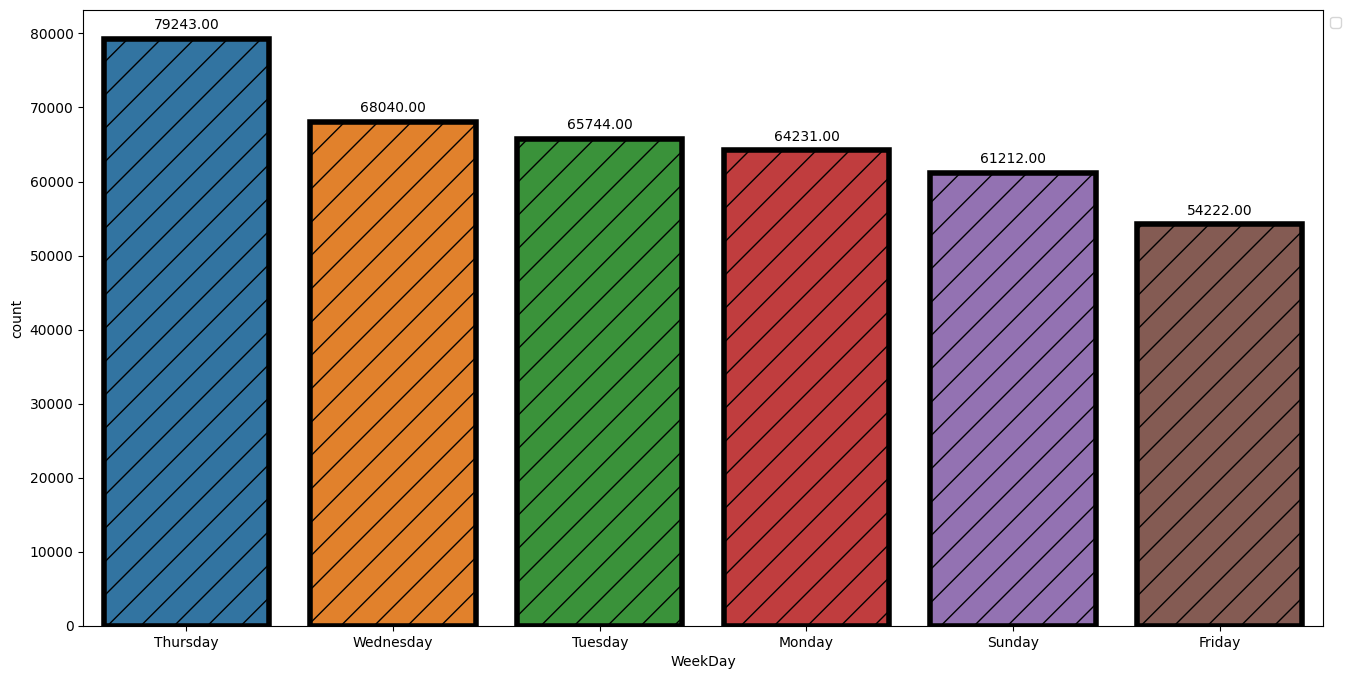

In [ ]:
# visualization code

plt.figure(figsize=(16,8))
ax=sns.countplot(x=df_retail_1['WeekDay'], order=df_retail_1['WeekDay'].value_counts().index,lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is evident that the maximum frequency of purchase occurred on Thursday followed by wednesday and Tuesday. Friday has the least frequency of purchase as customer have leisure time in this period. As their is no occurrence of purchase on Saturday it means Saturday is a holiday/ weekly Off for the retail store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights is positive as Thursday became the highest sales day of the week but on other days store also performs though there is dip in sales but not that much when we compare to Thursday.As friday is considered as leisure time so we must follow a email popup campaigning to avail offers to customers so that we can acquire as much as customer we can which adds up in our monetary value and us a cut above as compare to our competitors.

#### Chart - 4- Bar Plot ( Weekday Having The Utmost Revenue)

In [ ]:
# Initializing Variable having the utmost revenue generated weekday.
weekly_sales=df_retail_1.groupby(by='WeekDay')['Total_Price'].sum().sort_values(ascending=False)

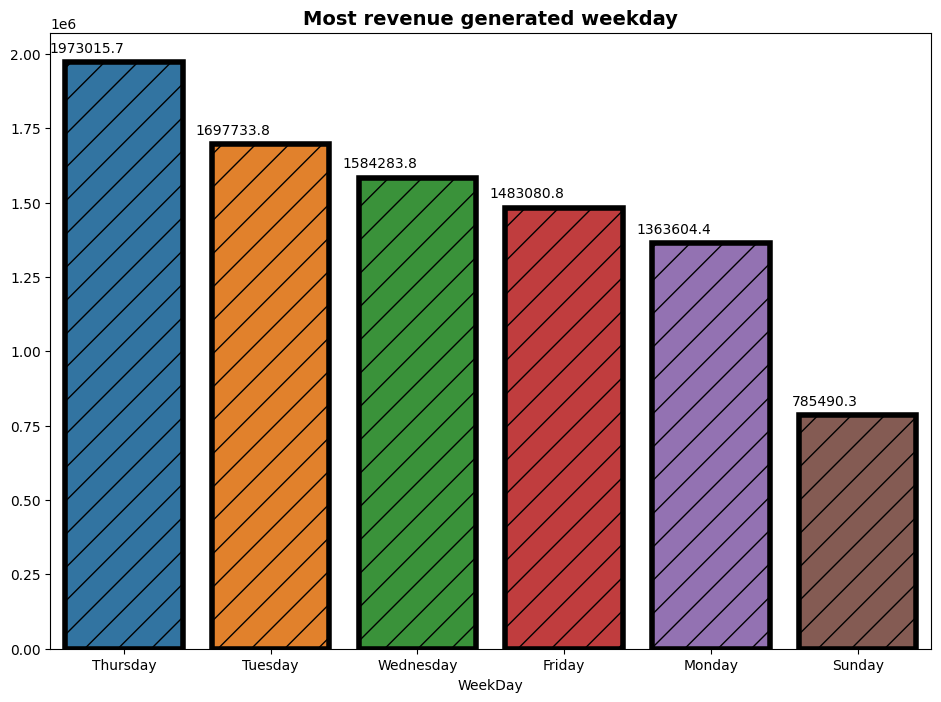

In [ ]:
# Visualization Code
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
ax=sns.barplot(x=weekly_sales.index, y=weekly_sales.values, order=weekly_sales.index,lw=4,
               ec='black',hatch='/')
plt.title("Most revenue generated weekday", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is evident that Thursday being the Top revenue generated weekday followed by Tuesday and Wednesday.Least Revenue generated weekday is Sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights gained have a positive impact on business as Thursday being the highest revenue generated weekday, but on the other days we have a satisfactory revenue generation except sunday and the reason behind that is, Saturday is weekly off for the store, so the opening revenue is low but afterwards its gradually increases.

#### Chart- 5- Bar Plot ( TimePeriod Purchasing Stats)

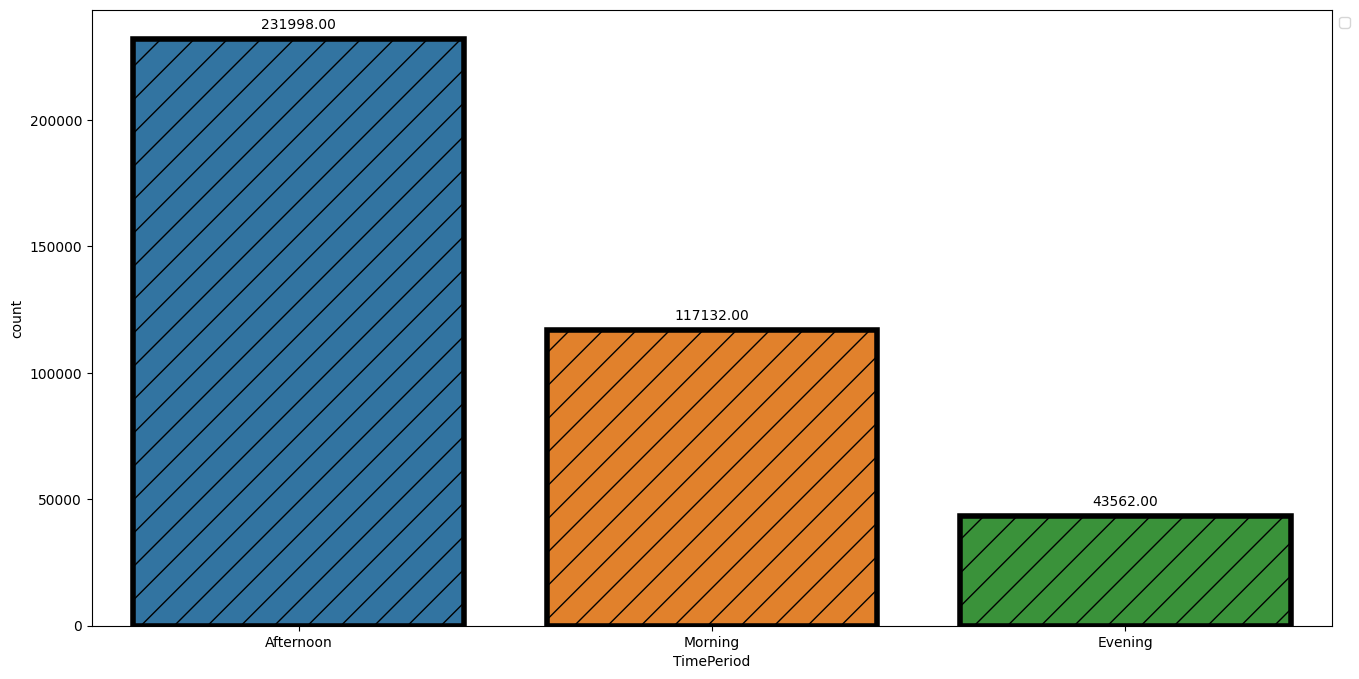

In [ ]:
# Visualization Code
plt.figure(figsize=(16,8))
ax=sns.countplot(x=df_retail_1['TimePeriod'], order=df_retail_1['TimePeriod'].value_counts().index,lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above plot it is evident that the maximum rush hours for purchase is in Afternoon followed by morning and evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have a partial positive impact on business as it shows that most of the customers purchased during afternoon time as compare to morning and evening hours.But we have to make our evening hours also productive as in evening customers have leisure time after office between 8pm - 11pm, so we can float hourly sales offers on the most preferred products which in turn increases our customer acquisition and monetary value.

##**Geographical Stats**

#### Chart - 1- World Map (Highest and Lowest Revenue Country)

In [ ]:
# Initializing the variable for Highest and Lowest revenue generated country.
country_sales = df_retail_1.groupby(by='Country')['Total_Price'].sum().sort_values(ascending=False)

In [ ]:
#necessary imports for plotly and map
import os
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

In [ ]:
# Visualization code

# Filter the top 15 highest and lowest revenue generated countries
top_countries = country_sales.head(15)
bottom_countries = country_sales.tail(15)

# Create a choropleth map for the top 15 highest revenue countries
trace_top = go.Choropleth(
    locations=list(top_countries.index),
    locationmode='country names',
    z=list(top_countries.values),
    text=top_countries.index,
    reversescale=False,
    zauto=True,
    colorscale='RdBu',
    marker=dict(
        line=dict(
            color='rgb(0,0,0)',
            width=0.5)
    ),
    colorbar=dict(
        title='Total Revenue',
        tickprefix='£')
)

# Create a choropleth map for the bottom 15 lowest revenue countries
trace_bottom = go.Choropleth(
    locations=list(bottom_countries.index),
    locationmode='country names',
    z=list(bottom_countries.values),
    text=bottom_countries.index,
    reversescale=False,
    zauto=True,
    colorscale='RdBu',
    marker=dict(
        line=dict(
            color='rgb(0,0,0)',
            width=0.5)
    ),
    colorbar=dict(
        title='Total Revenue',
        tickprefix='£')
)

data = [trace_top, trace_bottom]
layout = go.Layout(
    title='Highest and Lowest Revenue Generated Countries',
    geo=dict(
        showframe=True,
        showlakes=False,
        showcoastlines=True,
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

##### 1. Why did you pick the specific chart?

World maps provide valuable context for the data. By visualizing data in the context of global geography, it becomes easier to understand how different regions and countries contribute to the overall trends.World maps can be a powerful tool for storytelling and effective communication. They can highlight global disparities, regional trends, or clusters of data, making complex data more accessible and understandable.

##### 2. What is/are the insight(s) found from the chart?

From the above world map it is clearly evident that United Kingdom has the highest revenue of 7M pounds and saudi arabia has on the least revenue scale and generates only 145 pounds which is merely good for nothing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights has the positive impact on business as our retail store is UK based and so obviously we must have good revenue from UK and ultimately we achieved an eye catching number with perpective of revenue that shows 7M pounds revenue from UK.We can also see the areas near by UK also shows a remarkable revenue stats like France, Germany, Nertherlands and Eire have a total of around 8M pounds revenue.

#### Chart - 2- World Map (Highest and lowest country by Purchasing Quantity)

In [ ]:
# Initiating Variable for Highest and Lowest Quantity Purchase Country.
Quantity_sales=df_retail_1.groupby(by='Country').agg({'Quantity' : 'sum',
                                      'Total_Price' : 'sum'}).sort_values(by=['Quantity'], ascending=False)

In [ ]:
# Visualization Code

# Filter the top 15 highest and lowest quantity purchasing countries
top_countries = Quantity_sales.head(15)
bottom_countries = Quantity_sales.tail(15)

# Create a choropleth map for the top 15 highest quantity purchasing countries
trace_top = go.Choropleth(
    locations=list(top_countries.index),
    locationmode='country names',
    z=list(top_countries['Quantity']),
    text=top_countries.index,
    reversescale=False,
    zauto=True,
    colorscale='RdBu',
    marker=dict(
        line=dict(
            color='rgb(0,0,0)',
            width=0.5)
    ),
    colorbar=dict(
        title='Total Quantity Purchased',
        tickprefix='')
)

# Create a choropleth map for the bottom 15 lowest quantity purchasing countries
trace_bottom = go.Choropleth(
    locations=list(bottom_countries.index),
    locationmode='country names',
    z=list(bottom_countries['Quantity']),
    text=bottom_countries.index,
    reversescale=False,
    zauto=True,
    colorscale='RdBu',
    marker=dict(
        line=dict(
            color='rgb(0,0,0)',
            width=0.5)
    ),
    colorbar=dict(
        title='Total Quantity Purchased',
        tickprefix='')
)

data = [trace_top, trace_bottom]
layout = go.Layout(
    title='Highest and Lowest Quantity Purchasing Countries',
    geo=dict(
        showframe=True,
        showlakes=False,
        showcoastlines=True,
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above World Map it is evident that UK has emerged the highest purchasing quantity country with 4.2M product purchased and Saudi Arabia has the lowest purchasing quantity country with only 80 product purchased.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained Insights are positive as Uk emerged out as the highest purchasing quantity country and our retail store is based in Uk, so it is successful to gather as much as customer which adds up in monetary value. The areas in the vicinity of UK like Netherlands, France, Eire, Germany also contributed upto a great extent and have total purchase quantity of 5.5M products.

##**Behavioral Stats**(Product sales Stats and Most Preferred Products)

#### Chart -1- World Cloud(Showing Most Preferred Products)

In [ ]:
# Value_Counts of most preferred products.
df_retail_1['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
                                      ... 
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL BAG CHARM               1
BLUE/NAT SHELL NECKLACE W PENDANT        1
PINK EASTER HENS+FLOWER                  1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3877, dtype: int64

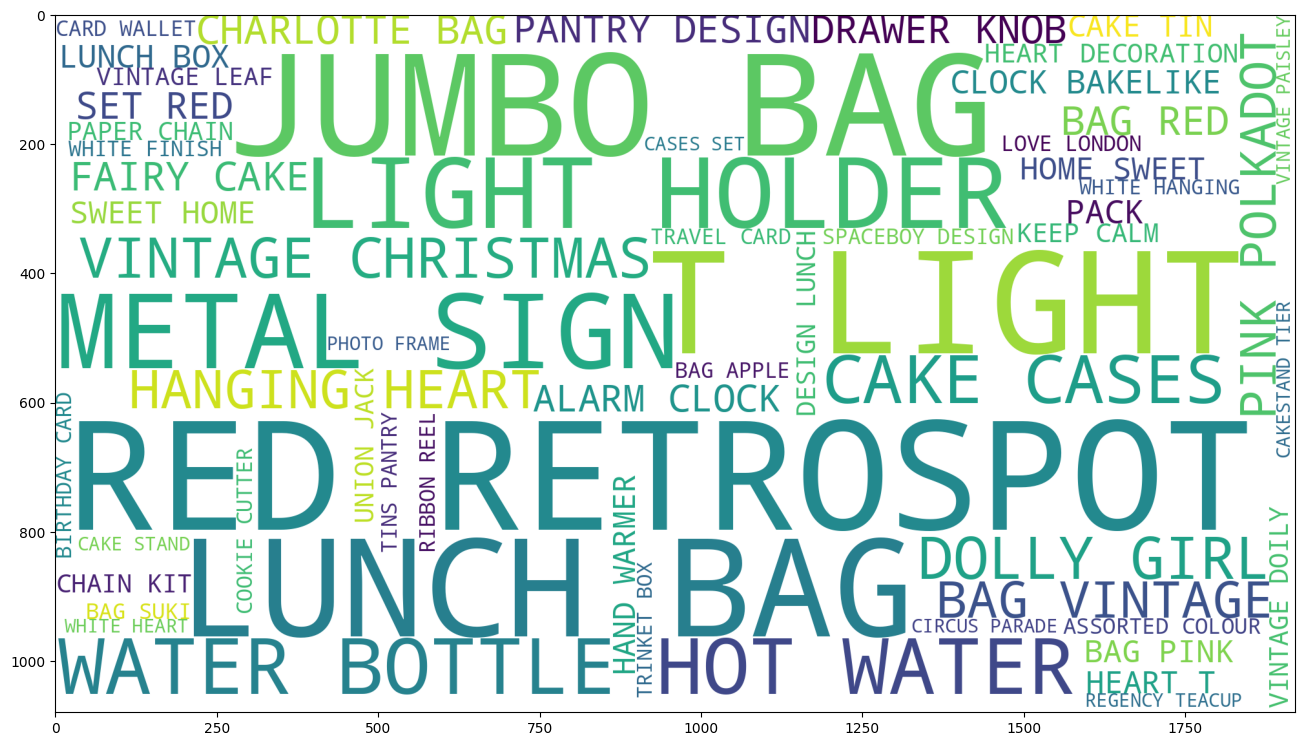

In [ ]:
from wordcloud import WordCloud
text = " ".join(df_retail_1['Description'].values.tolist())
img = WordCloud(width=1920, height=1080,
                background_color='white', max_words=60).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(img)

##### 1. Why did you pick the specific chart?


Word cloud is a popular data visualization technique used to represent textual data. It is primarily used to visually display the frequency or importance of different words in a given text corpus. The more frequently a word appears in the text, the larger and bolder it appears in the word cloud.It is visually engaging and appealing and the variation in font size and color makes it easy to identify the most important or frequent words at a glance.

##### 2. What is/are the insight(s) found from the chart?

From the World Cloud it is evident that the products like- *White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrostop, Party Bunting* are the most preferred and demanding products by customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights drawn just tells the frequency of the most preferred and demanding products by the customers,so we can't conclude now that it is creating a positive impact on business or not until and unless we know how much these products are contributing towards monetary value and sales volume and to achieve it we have to analyze these products with other features like Total_Price and Quantity to come with final conclusion.

#### Chart - 2- Bar Plot( Products By Sales Volume)

In [ ]:
product_volume=df_retail_1.groupby('Description')['Quantity'].sum().sort_values(ascending=False) # Initiate variable for volume of products.

<Axes: title={'center': 'Top Sold Products'}, ylabel='Description'>

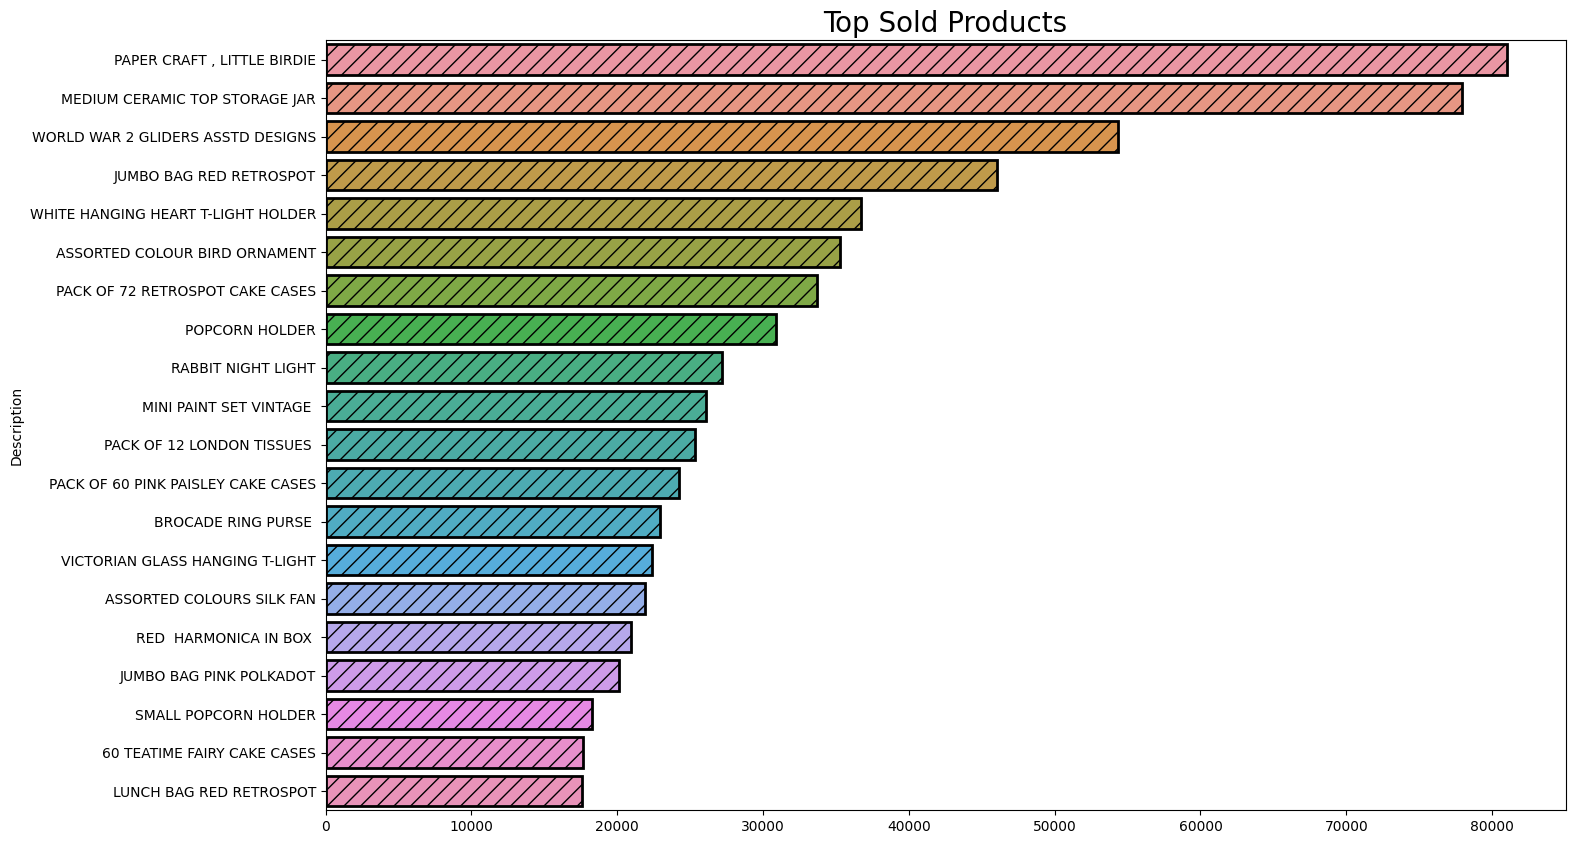

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Top Sold Products", fontsize=20)
sns.barplot(x=product_volume[:20].values, y=product_volume[:20].index,ec='black',linewidth=2,hatch='//')

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above plot it is evident that some of the products which are most preferred and demanding are also the most sold products by volume and they are- *White Hanging Heart T-Light Holder, Jumbo Bag Red Retrostop, Assorted Color Bird Ornament*.The top most product sold by volume is **PAPER CRAFT , LITTLE BIRDIE**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights are positive as we have some of the preferred and demanding products in our top sold product list by volume,so we can infer that customers are ordering those products which are most preferred by them.**PAPER CRAFT , LITTLE BIRDIE** has highest volume of sales but its frequency occurred only once,it means it is purchased by a wholesaler customer.

#### Chart - 3- Bar Plot( Products By Revenue)

In [ ]:
# Initializing variable for Revenue generation of products.
revenue_generated=df_retail_1.groupby('Description')['Total_Price'].sum().sort_values(ascending=False)

<Axes: title={'center': 'Top Revenue Generated Products'}, ylabel='Description'>

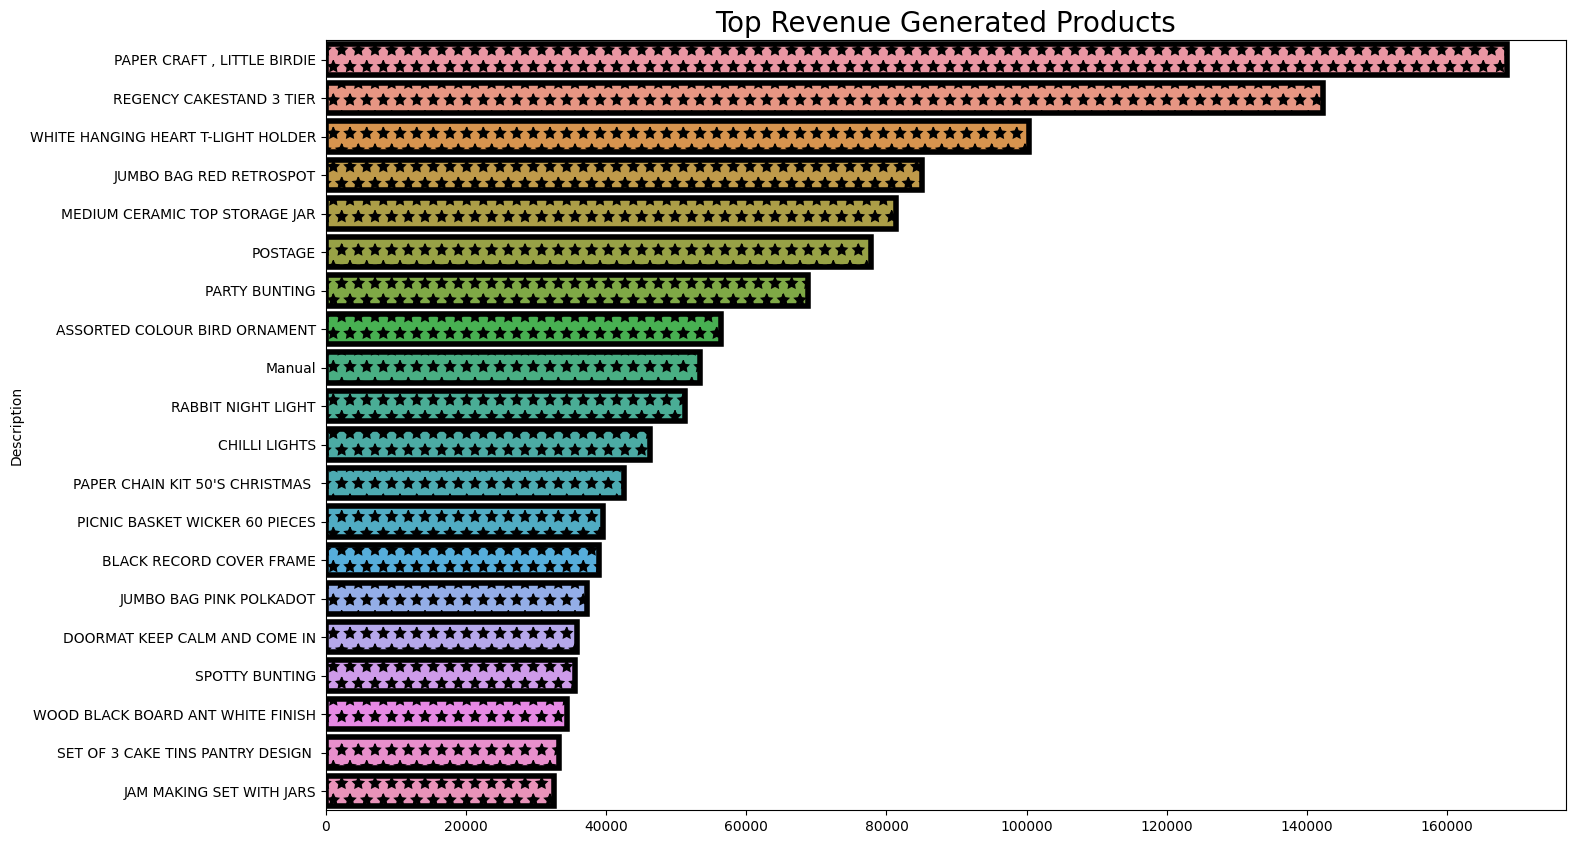

In [ ]:
# Visualization code.
plt.figure(figsize=(16,10))
plt.title("Top Revenue Generated Products", fontsize=20)
sns.barplot(x=revenue_generated[:20].values, y=revenue_generated[:20].index,lw=4,
               ec='black',hatch='*')

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above plot it is evident that the highest revenue generating product is **PAPER CRAFT , LITTLE BIRDIE** which is also the most sold product by volume.Most Preferred and demanding products are also among the top 7 revenue generating products and contributing utmost towards the monetary value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have positive impact on the business as the most preferrable and demanding products are among the top 7 revenue generating product and they are- WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT, and PARTY BUNTING.So we can conclude that the customers are purchasing those products which they preferred the most and it adds up a remarkable monetary value in our business.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are missing values in customerID and Description that totally constitute 136534 missing records.As customerID and Description are among the main features for our analysis, so we can't move with missing values and that's the reason I have dropped all missing values in our Data Wrangling process which helped us for better analysis in our data visualization process.

### 2. Handling Outliers

There are outliers in UnitPrice and Quantity as we have such data records having quantity in negative units(order cancelled) and unitPrice equal to zero which are errorneous data records,so I have discarded these records and take only those data records which are correct and suitable for analysis purpose.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation and Selection

*Unique Stock Codes and Description*

In [ ]:
#Finding the number of unique items in stock.
print(f"Number of unique item stock codes: {len(df_retail_1.StockCode.unique())}")
print(f"Number of unique item descriptions: {len(df_retail_1.Description.unique())}")

Number of unique item stock codes: 3665
Number of unique item descriptions: 3877


The above information implies that some stock unit code might have more than one descriptions.we have to check this data discrepency issue.

In [ ]:
#Finding out the stock unit code having more than one description.
dfStockDesc = df_retail_1.groupby(["StockCode","Description"]).count().reset_index()
dfStockDesc.StockCode.value_counts()[dfStockDesc.StockCode.value_counts()>1].reset_index()

,index,StockCode
0,23196,4
1,23236,4
2,23126,3
3,23396,3
4,23535,3
...,...,...
208,23536,2
209,22950,2
210,22949,2
211,23091,2


In [ ]:
# Copying data into another variable.
customer_df= df_retail_1.copy()

*Filtering only UK country Data*

We have noticed in our Data Visualization Process that majority of the transactions belonged to UK, so it makes sense to consider only this country data for maximum impact.

In [ ]:
#considering united kingdom data only.
customer_df = customer_df[customer_df.Country == "United Kingdom"]

In [ ]:
# Viweing  shape of data after taking only UK data
customer_df.shape

(349203, 13)

In [ ]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year,Month,WeekDay,TimePeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December,Wednesday,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December,Wednesday,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,Morning


**Creating Features for RFM Analysis**

RFM is one of the techniques used for CRM and customer segmentation. It enables customers to be divided into groups based on their purchasing behaviors and companies to develop strategies specific to these groups.Each metric in RFM will be calculated specifically for each customer. Let’s define Recency, Frequency, and Monetary metrics that milestones for RFM Analysis process.

**Recency** => How recent was the customer's last purchase? Number of days between analysis date and last invoice date.

**Frequency**=> How often did this customer make a purchase in a given period? Number of purchases.

**Monetary** => How much money did the customer spend in a given period? In other words, how much money will the company potentially earn from a particular customer?



In [ ]:
# Splitting Date and Time from InvoiceDate Feature.
customer_df['Date'] = customer_df['InvoiceDate'].dt.date
customer_df['Time'] = customer_df['InvoiceDate'].dt.time
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year,Month,WeekDay,TimePeriod,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December,Wednesday,Morning,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,Morning,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December,Wednesday,Morning,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,Morning,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,Morning,2010-12-01,08:26:00


In [ ]:
# Initializing Recency, Frequency, Monetary Features.
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Convert the 'Date' column to datetime type
customer_df['Date'] = pd.to_datetime(customer_df['Date'])

#Create RFM Analysis scores for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'Date': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total_Price': lambda x: x.sum()})

#Convert 'Date' into type int
rfm_df['Date'] = rfm_df['Date'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'Date': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total_Price': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4412,33053.19
3,12749,4,199,4090.88
4,12820,4,59,942.34


**Getting Quantiles to each Customer**

In [ ]:
# Obtain quantile of each customer
def get_quantile(df, column, start_n_quantiles, end_n_quantiles, step=1):

    category_label = range(start_n_quantiles, end_n_quantiles, step)

    quantiles = pd.qcut(df[column], q=abs(
        end_n_quantiles - start_n_quantiles), labels=category_label)

    df = df.assign(name=quantiles.values)

    new_column_name = column + '_Q'

    return df.rename(columns={"name": new_column_name})

In [ ]:
# Applying function which we have created above.
df_rfm_quantile = rfm_df.copy()
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Recency', 4, 0, -1)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Frequency', 1, 5)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Monetary', 1, 5)

df_rfm_quantile.head()

,Recency,Frequency,Monetary,Recency_Q,Frequency_Q,Monetary_Q
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12747,3,103,4196.01,4,4,4
12748,1,4412,33053.19,4,4,4
12749,4,199,4090.88,4,4,4
12820,4,59,942.34,4,3,3


**Getting RFM_GROUP and RFM_SCORE**

In [ ]:
# Concatenate quartile values and assign to 'RFM_Group' column.
df_rfm_quantile['RFM_Group'] = df_rfm_quantile['Recency_Q'].astype(str).str.cat(df_rfm_quantile['Frequency_Q'].astype(str)).str.cat(df_rfm_quantile['Monetary_Q'].astype(str))

df_rfm_quantile.head()

,Recency,Frequency,Monetary,Recency_Q,Frequency_Q,Monetary_Q,RFM_Group
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,4,114
12747,3,103,4196.01,4,4,4,444
12748,1,4412,33053.19,4,4,4,444
12749,4,199,4090.88,4,4,4,444
12820,4,59,942.34,4,3,3,433


In [ ]:
# Calculating RFM_Score.
df_rfm_quantile['RFM_Score'] = df_rfm_quantile[['Recency_Q','Frequency_Q','Monetary_Q']].sum(axis=1)

df_rfm_quantile.head()

,Recency,Frequency,Monetary,Recency_Q,Frequency_Q,Monetary_Q,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,114,6
12747,3,103,4196.01,4,4,4,444,12
12748,1,4412,33053.19,4,4,4,444,12
12749,4,199,4090.88,4,4,4,444,12
12820,4,59,942.34,4,3,3,433,10


**Creating Customer Segmentation**

In [ ]:
# Initializing Function for Customer Segmentation on the basis of RFM_Score.
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return '1.Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return '2.Silver'
    else:
        return '3.Bronze'

In [ ]:
#Extracting Mean and Count of RFM with respect to customer segments.
df_rfm_quantile['customer_Segment'] = df_rfm_quantile.apply(segment_me, axis=1)

df_rfm_custom_segment = df_rfm_quantile.groupby('customer_Segment').agg({
    'Recency': ['mean','count'],
    'Frequency': ['mean','count'],
    'Monetary': ['mean', 'count']
}).round(1)

df_rfm_custom_segment

Recency       Frequency       Monetary      
                    mean count      mean count     mean count
customer_Segment                                             
1.Gold              27.2  1519     185.9  1519   3931.3  1519
2.Silver           100.0  1697      34.8  1697    693.6  1697
3.Bronze           216.7   704      10.9   704    193.8   704

### 4. Data Transformation

*Checking the Skewness of Recency, Frequency and Monetary Value*

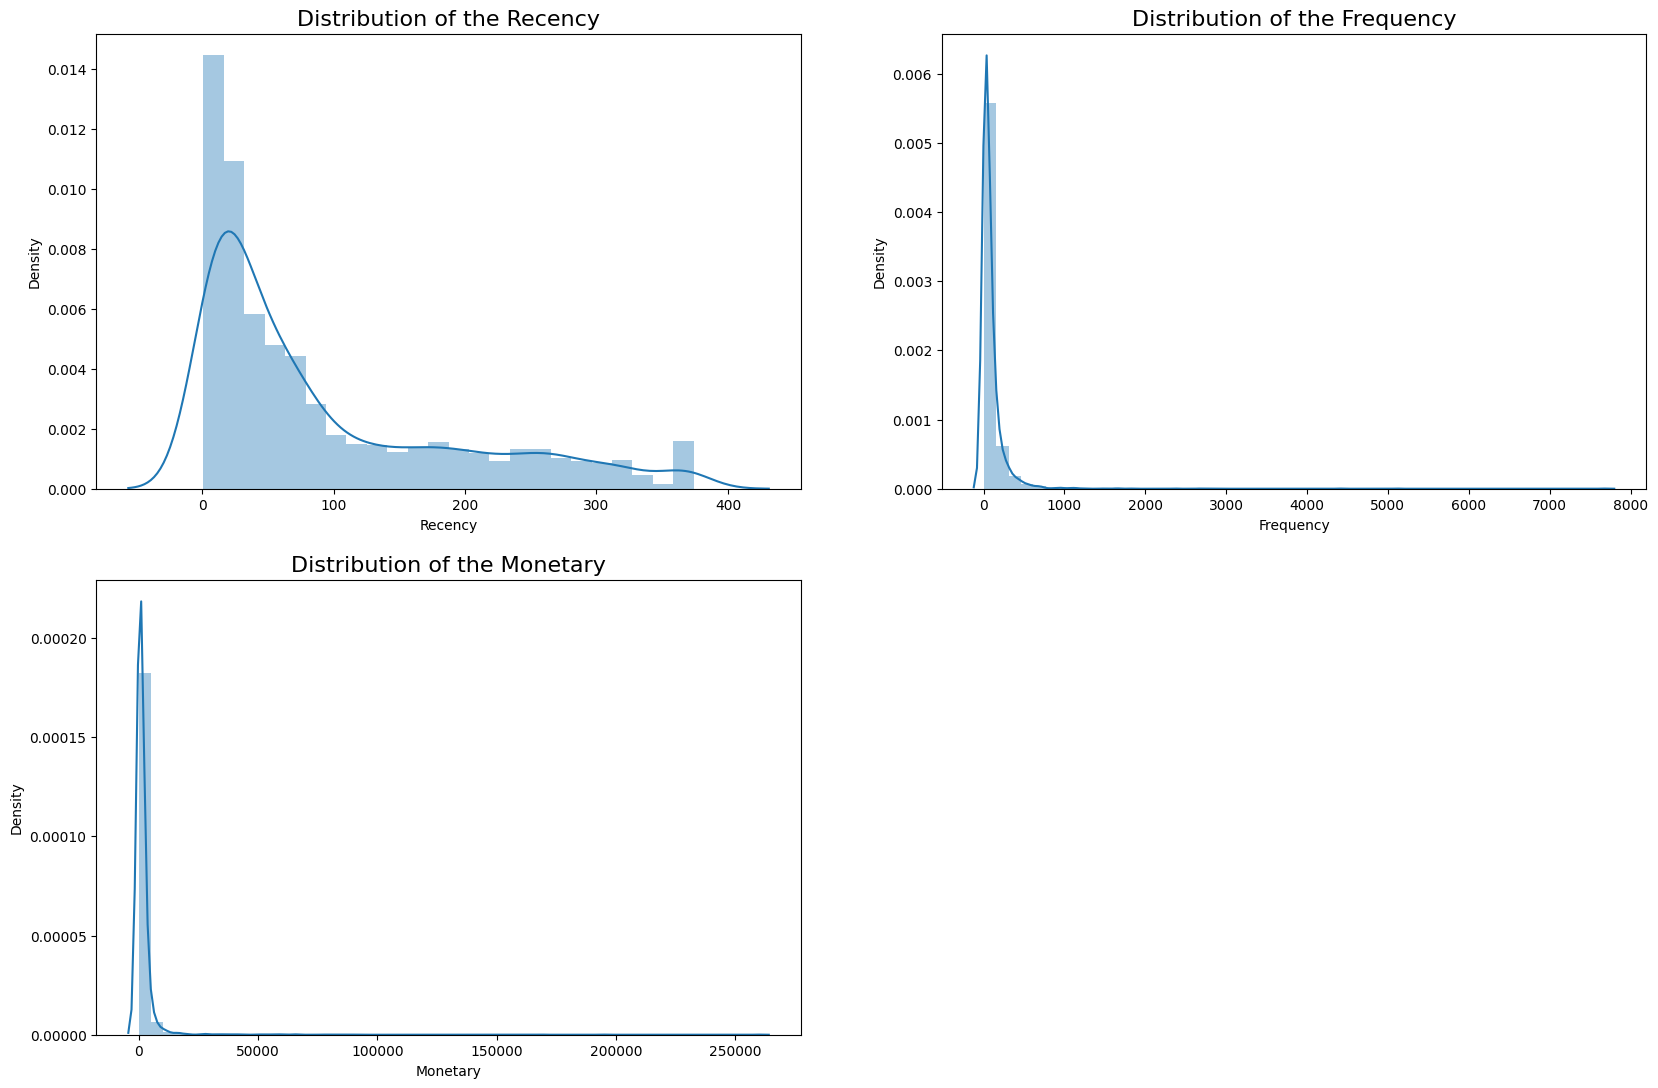

In [ ]:
# plotting the distribution of the RFM values.
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

*From the above distribution it is very evident that the RFM values are positively skewed and as we know according to the assumptions of the ML models the data must have normal distribtion,so we have to apply some transformation techniques like log transformation, square root transformation or inverse transformation whichever is suitable according to our data.*

In [ ]:
# Viewing the stats of RFM values.
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,89.082398,1858.424654
std,99.533485,214.034542,7478.631256
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,298.185000
50%,51.000000,40.000000,644.975000
75%,143.000000,98.000000,1571.285000
max,374.000000,7676.000000,259657.300000


In [ ]:
# Applying Log Transformation to RFM values.
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

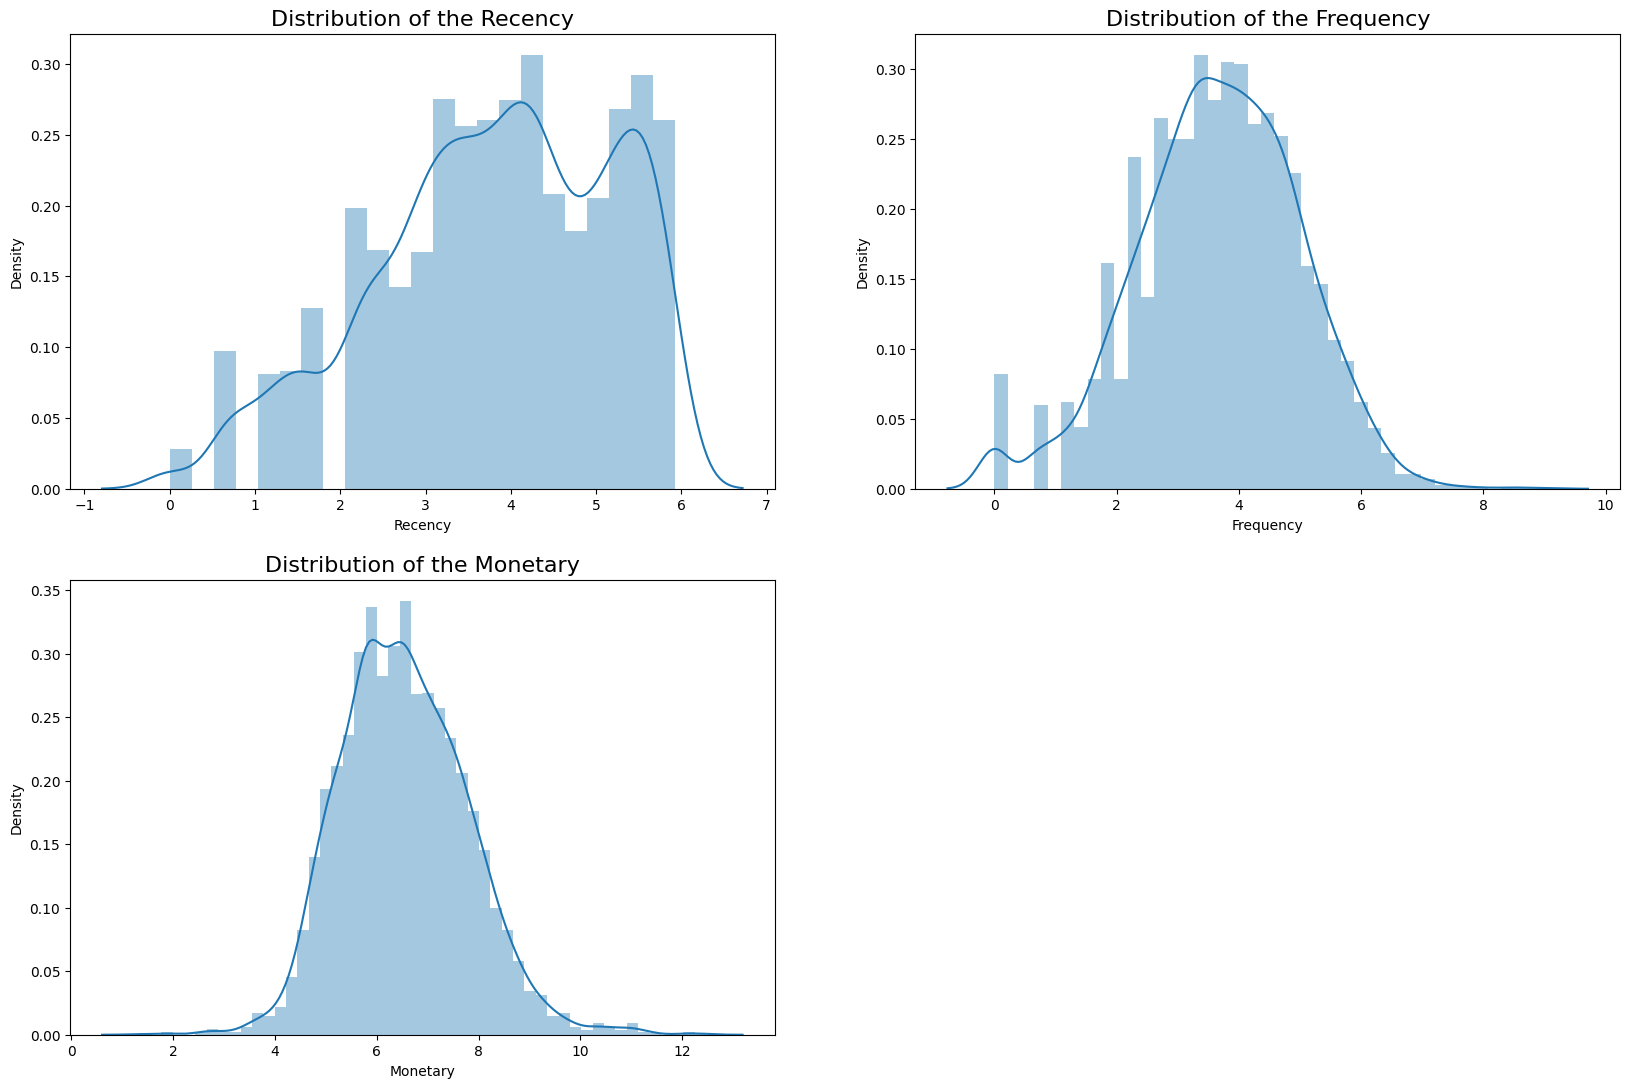

In [ ]:
# Plotting the Log Transformation.
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

In [ ]:
#Applying Log Transformation to Original RFM Dataframe.
# But first make copy of original RFM data to save it.
rfm_log=rfm_df.copy()
rfm_log['Recency'] = rfm_log['Recency'].apply(math.log)
rfm_log['Frequency'] = rfm_log['Frequency'].apply(math.log)
rfm_log['Monetary'] = rfm_log['Monetary'].apply(math.log)


In [ ]:
rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,5.786897,0.000000,11.253942
12747,1.098612,4.634729,8.341889
12748,0.000000,8.392083,10.405873
12749,1.386294,5.293305,8.316515
12820,1.386294,4.077537,6.848366


According to the Skewness present in our data I have used **Log Transformation** that helps in reducing skewness and stabilizing the variance, making the data more suitable for modeling.

### 5. Data Scaling

In [ ]:
# Scaling the data for clustering.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
df_rfm_normal = scaler.transform(rfm_log)

df_rfm_normal = pd.DataFrame(df_rfm_normal, index=rfm_log.index, columns=rfm_log.columns)

# Check result after standardising
df_rfm_normal.describe().round(3)


,Recency,Frequency,Monetary
count,3920.000,3920.000,3920.000
mean,0.000,-0.000,0.000
std,1.000,1.000,1.000
min,-2.748,-2.742,-4.180
25%,-0.657,-0.615,-0.673
50%,0.096,0.027,-0.055
75%,0.842,0.699,0.659
max,1.538,3.972,4.752


In [ ]:
df_rfm_normal.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,1.438428,-2.741768,3.779901
12747,-1.953555,0.736625,1.446001
12748,-2.748403,3.556544,3.100206
12749,-1.745416,1.230891,1.425664
12820,-1.745416,0.318449,0.248998


##### Which method have you used to scale you data and why?

I have used **Standard Scalar** method to scale the data because after transformation our data follows normal distribution and it always been a good choice to go with standard scaler if data have normal distribution and it scales the data to have a mean of 0 and a standard deviation of 1.

## ***6. ML Model Implementation***

### ML Model - 1- K-Means Clustering

In [ ]:
# Importing required packages.
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Initiating Function for optimal cluster selection.
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans

    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values of Inertia and Silhouette Score.
        Lineplot of values of Inertia and Silhouette Score.
    '''

    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
    inertia = []

    # Creating loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
        inertia_score = round(kmeans.inertia_, 2)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters,
            silhouette_avg,
            round((km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]),3),
            inertia_score,
            round((inertia[n_clusters - start] - inertia[n_clusters - start - 1]),3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sns.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The K-means clustering algorithm computes centroids and repeats until the optimal centroid is found. It is presumptively known how many clusters there are. It is also known as the **flat clustering algorithm**. The number of clusters found from data by the method is denoted by the letter ‘K’ in K-means.

K-means implements the **Expectation-Maximization strategy** to solve the problem. The Expectation-step is used to assign data points to the nearest cluster, and the Maximization-step is used to compute the centroid of each cluster.

*Approach To Find Optimal Cluster:*



* *Elbow Method*(Within Cluster Sum of Squares/Inertia)

In this method, data points are assigned to clusters in such a way that the sum of the squared distances between the data points and the centroid is as small as possible. It is essential to note that reduced diversity within clusters leads to more identical data points within the same cluster.
* *Silhouette Score*(Math Method)

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:



* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

**The Silhouette Coefficient for a sample is  S**=(b−a)/max(a,b) .









No. Clusters: 2, Silhouette Score(SS): 0.396, SS Delta: 0.0, Inertia: 6191.35, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.304, SS Delta: -0.092, Inertia: 4789.09, Inertia Delta: -1402.26
No. Clusters: 4, Silhouette Score(SS): 0.301, SS Delta: -0.003, Inertia: 3992.07, Inertia Delta: -797.02
No. Clusters: 5, Silhouette Score(SS): 0.28, SS Delta: -0.021, Inertia: 3379.3, Inertia Delta: -612.77
No. Clusters: 6, Silhouette Score(SS): 0.275, SS Delta: -0.005, Inertia: 3018.25, Inertia Delta: -361.05
No. Clusters: 7, Silhouette Score(SS): 0.264, SS Delta: -0.011, Inertia: 2737.75, Inertia Delta: -280.5
No. Clusters: 8, Silhouette Score(SS): 0.26, SS Delta: -0.004, Inertia: 2528.32, Inertia Delta: -209.43
No. Clusters: 9, Silhouette Score(SS): 0.266, SS Delta: 0.006, Inertia: 2366.45, Inertia Delta: -161.87
No. Clusters: 10, Silhouette Score(SS): 0.258, SS Delta: -0.008, Inertia: 2226.8, Inertia Delta: -139.65


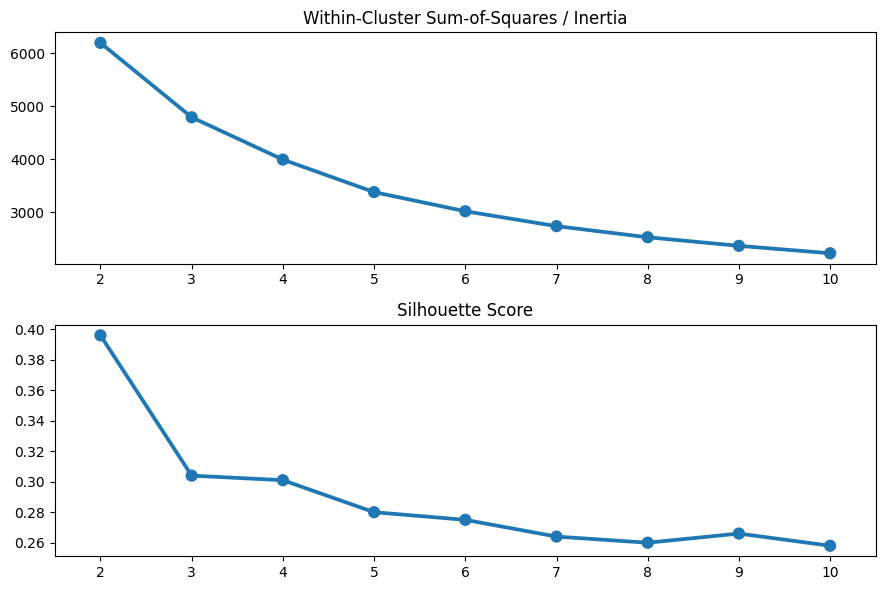

In [ ]:
# Visualizing evaluation Metrics
optimal_kmeans(df_rfm_normal)

*From the above plots and Silhouette Score it very clear that the optimum numbers of clusters can be 3, 4 or 5 based on the silhouette score and other evaluation metrics like SS Delta, Inertia and Inertia Delta.There is very close match among the values of evaluation metrics of cluster 3 and 4. So to be more precise we must go for visualization plots of following cluster to decide which cluster is segregating data points effectively and have compactness in cluster.*

In [ ]:
#ML-1 Model Implementation.
# Initiating Function to apply K-Means.
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    '''
    Implement k-means clustering on dataset

    INPUT:
        normalised_df_rfm : dataframe. Normalised rfm dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        original_df_rfm : dataframe. Original rfm dataset to assign the labels to.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

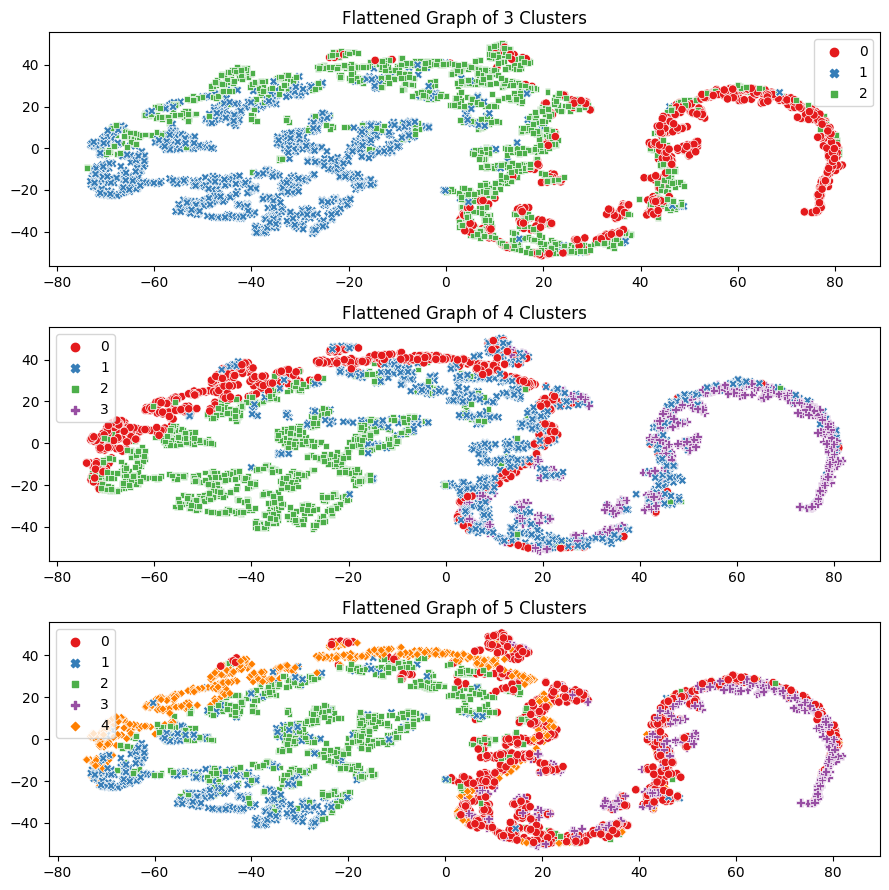

In [ ]:
#plotting clusters
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(df_rfm_normal, 3, rfm_df)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(df_rfm_normal, 4, rfm_df)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(df_rfm_normal, 5, rfm_df)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

*After careful observation through visualization and evaluation metrics, I have come with up the conclusion that the optimal number of cluster is  4, segregating the commom data points with compactness in clusters and having trade-off between the values of evaluation metrics.*

#### 2. Customer Personas Based on Clustering.

On the basis of clustering(cluster- 3, 4 and 5) we can make customer personas(purchasing behaviour) and categorize them into different categories like high value customer, medium value customers, low value customers , Hibernating customers etc which will help us to target customers according to their categorization.

*Summary Statistics*

In [ ]:
#Initializing Function for customer Personas.
def rfm_values(df):
    '''
    Calcualte average RFM values and size for each cluster

    '''
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new

In [ ]:
# Stats with 3 cluster.
rfm_values(df_rfm_k3)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          13.0     260.0   5959.0   835
1         171.0      15.0    287.0  1409
2          66.0      66.0   1137.0  1676

In [ ]:
# Stats with 4 cluster
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          21.0      38.0    567.0   784
1          94.0      82.0   1478.0  1134
2         185.0      15.0    285.0  1246
3          12.0     276.0   6361.0   756

In [ ]:
# Stats with 5 cluster.
rfm_values(df_rfm_k5)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          60.0     107.0   1920.0   960
1         176.0       7.0    194.0   602
2         172.0      30.0    487.0  1049
3           9.0     303.0   7208.0   614
4          20.0      35.0    558.0   695

*These stats gives us the mean and count of Recency, Frequency and Monetary with respect to cluster number they belong to through which we can categorize the customers into different-different groups.*

#### 3. Snake Plots

 Snake plots provide a compact and intuitive way to visualize the profiles of individual clusters. Each cluster is represented by a separate line (or "snake") in the plot, and each axis corresponds to a feature or variable. The lines show how the feature values change for data points within a cluster as we move along the axis. This allows us to compare the characteristics of different clusters and identify their distinguishing features.

In [ ]:
#creating function for snake plot
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    '''
    Transform dataframe and plot snakeplot
    '''
    # Transform df_normal as df and add cluster column
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm,
                                       index=rfm_df.index,
                                       columns=rfm_df.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(),
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'],
                        var_name='Metric',
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

    return

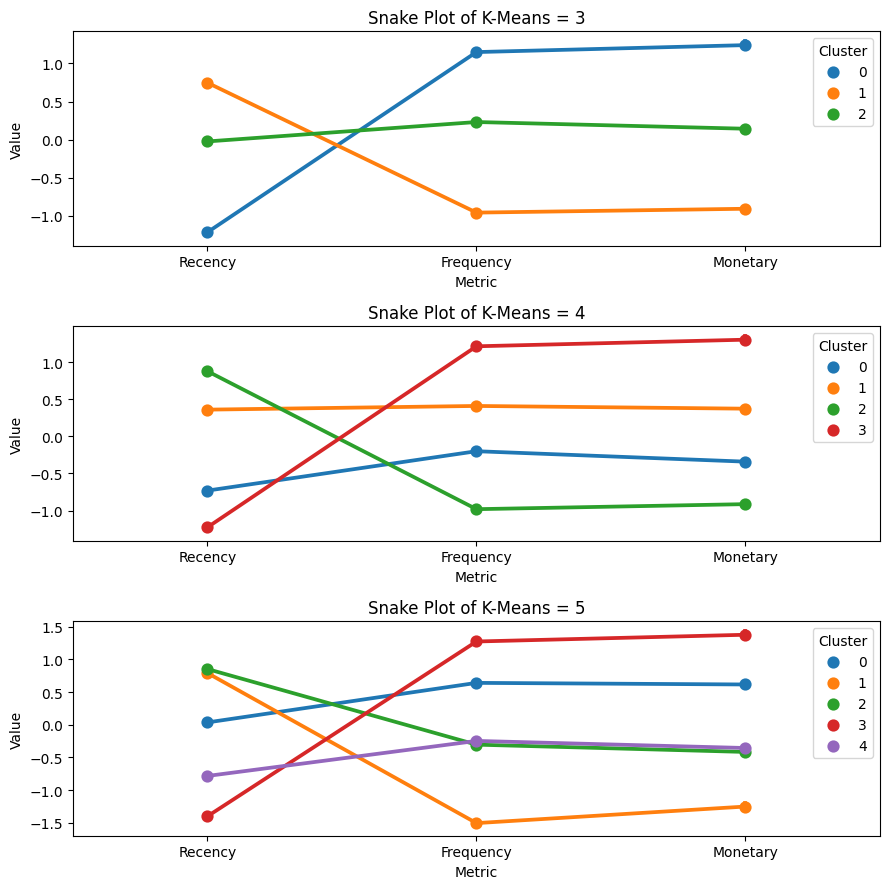

In [ ]:
#plotting snake plot
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(df_rfm_normal, df_rfm_k3, rfm_df)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(df_rfm_normal, df_rfm_k4, rfm_df)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(df_rfm_normal, df_rfm_k5, rfm_df)

plt.tight_layout()

#### 4. Data Pre-Processing for Cluster-Based Modelling

*Considering Model having 4 clusters as optimal number of clusters comes out to be four.*

(3920, 4)

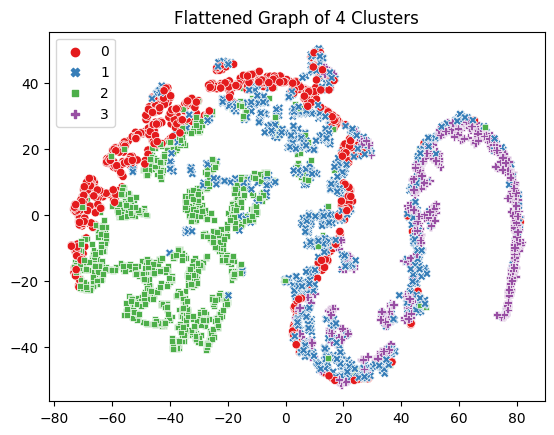

In [ ]:
#Model having 4 clusters
df=kmeans(df_rfm_normal, 4, rfm_df)
df.shape

In [ ]:
#Assigning cluster colum to data frame
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(df_rfm_normal)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a cluster label column in original dataset
df_new = rfm_df.assign(Cluster = cluster_labels)

In [ ]:
# Viewing dataframe with cluster column clubbed.
df_new.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,326,1,77183.60,1
12747,3,103,4196.01,3
12748,1,4412,33053.19,3
12749,4,199,4090.88,3
12820,4,59,942.34,0


In [ ]:
#getting unique values of cluster and count
df_new['Cluster'].value_counts()

2    1246
1    1134
0     784
3     756
Name: Cluster, dtype: int64

##### Data Splitting

In [ ]:
#splitting Data into dependent and independent variable
X=df_new[['Recency','Frequency','Monetary']]
y=df_new['Cluster']

In [ ]:
#splitting dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(3136, 3)
(784, 3)


##### Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# scaling dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Importing necessary packages and library

In [ ]:
# Machine learning model selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score
import sklearn.metrics as metrtics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

### ML Model - 2- Logistic Regression

In [ ]:
# ML Model - 2 Implementation
logistic_clf = LogisticRegression()
# Fit the Algorithm
logistic_clf.fit(X_train, y_train)

# Predict on the model
y_pred = logistic_clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic regression is a popular statistical model used for binary/multinominal classification problems. It is a generalized linear model that estimates the probability of an outcome belonging to a specific class based on input features.

The goal of logistic regression is to model the relationship between a set of independent variables (features) and a binary/multinominal dependent variable (target). It assumes a linear relationship between the features and the log-odds (also known as the logit) of the target variable. The logit function is the inverse of the sigmoid function, which maps the log-odds to a probability between 0 and 1.

Mathematically, the logistic regression model can be represented as:

log(p / (1 - p)) = β0 + β1x1 + β2x2 + ... + βn*xn

where:



* p is the probability of the target variable being in the positive class.
* β0, β1, β2, ..., βn are the coefficients (parameters) of the model.

*  x1, x2, ..., xn are the feature values.







In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', logistic_clf.score(X_train,y_train))
print('Test ROC-AUC score : ', logistic_clf.score(X_test,y_test))

Train ROC-AUC score :  0.7066326530612245
Test ROC-AUC score :  0.6926020408163265


In [ ]:
## Accuracy of logistic Regression model
logistic_accuracy = accuracy_score(y_test,y_pred)
print(f"Using logistic regression we get an accuracy of {round(logistic_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 69.26%


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       156
           1       0.55      0.58      0.56       221
           2       0.76      0.65      0.70       258
           3       0.93      0.83      0.88       149

    accuracy                           0.69       784
   macro avg       0.72      0.71      0.71       784
weighted avg       0.71      0.69      0.70       784



<Axes: >

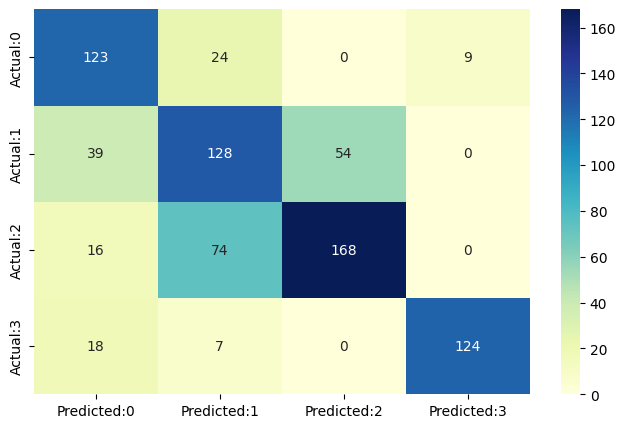

In [ ]:
# Confusion Matrix of logistic Regression Model
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2', 'Predicted:3'],index=['Actual:0','Actual:1','Actual:2', 'Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

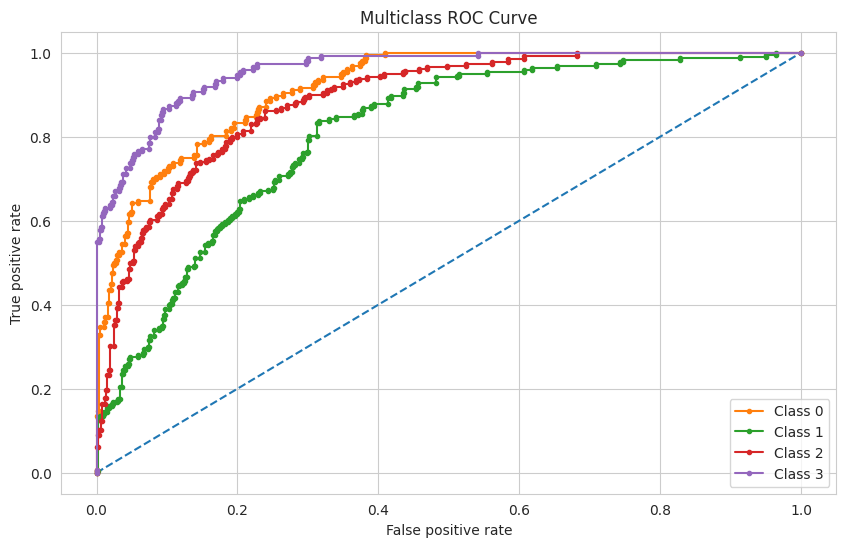

In [ ]:
# ROC curve and AUC
from sklearn.preprocessing import label_binarize

# Convert the true labels to binary format (OvR strategy)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Calculate predicted probabilities for each class using predict_proba
probs = logistic_clf.predict_proba(X_test)

# Calculate AUC for each class
log_auc = []
for i in range(n_classes):
    log_auc.append(roc_auc_score(y_test_binarized[:, i], probs[:, i]))

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], probs[:, i])

# Plot ROC curves for each class
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label=f'Class {i}')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

In [ ]:
#roc auc score
roc_auc_score(y_test, probs, multi_class='ovr', average='weighted')

0.8850467527443674

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# search for optimun parameters using gridsearch
params = {'penalty':['l2'],
         'C' : [200,1e+4,1e+5,1e+6,1e+7],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

In [ ]:
# Fit the Algorithm.
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 200, 'class_weight': 'balanced', 'penalty': 'l2'}

In [ ]:
# Predict on test data.
logistic_predict = logistic_clf.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', logistic_clf.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', logistic_clf.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8616071428571429
Test ROC-AUC score :  0.8571428571428571


In [ ]:
## Accuracy of logistic Regression model with CV and Hyperparameter tuning.
logistic_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(logistic_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 85.71%


In [ ]:
# Classification Report
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       156
           1       0.89      0.74      0.81       221
           2       0.88      0.87      0.87       258
           3       0.97      0.93      0.95       149

    accuracy                           0.86       784
   macro avg       0.86      0.87      0.86       784
weighted avg       0.87      0.86      0.86       784



<Axes: >

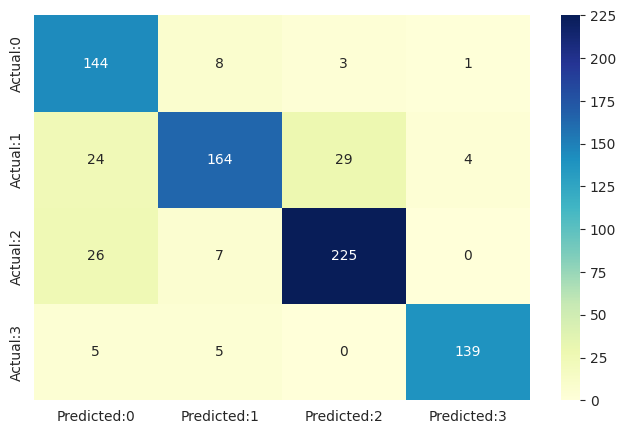

In [ ]:
# Confusion Matrix of logistic Regression Model after Hpyerparameter Tuning.
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2', 'Predicted:3'],index=['Actual:0','Actual:1','Actual:2', 'Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

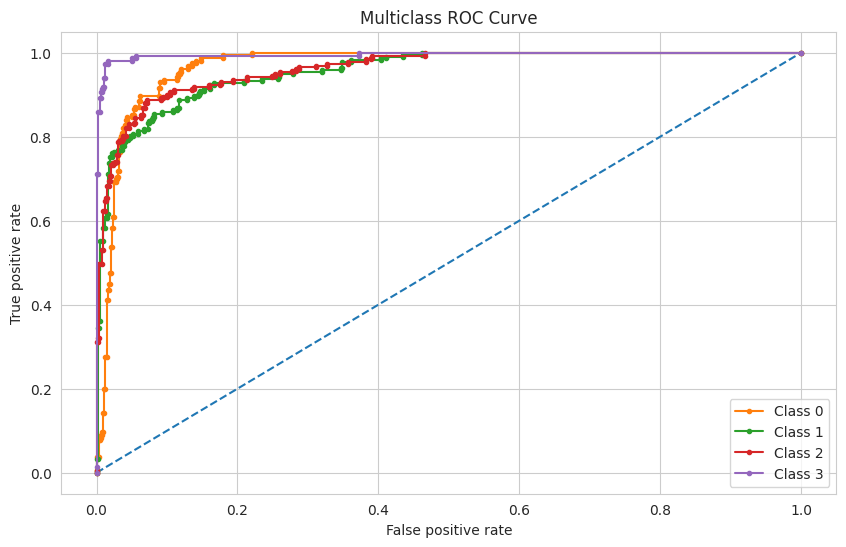

In [ ]:
# ROC curve and AUC
from sklearn.preprocessing import label_binarize

# Convert the true labels to binary format (OvR strategy)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Calculate predicted probabilities for each class using predict_proba
probs_1 = logistic_clf.predict_proba(X_test)

# Calculate AUC for each class
log_auc = []
for i in range(n_classes):
    log_auc.append(roc_auc_score(y_test_binarized[:, i], probs_1[:, i]))

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], probs_1[:, i])

# Plot ROC curves for each class
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label=f'Class {i}')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

In [ ]:
#roc auc score
roc_auc_score(y_test, probs_1, multi_class='ovr', average='weighted')

0.9680591058416932

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique because it exhaustively searches all possible combinations of hyperparameters and returns the most optimal results.By evaluating the performance of each combination, GridSearchCV is able to select the best value for each hyperparameter, leading to more accurate model tuning. This approach provides a thorough and reliable method for optimizing hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyperparamater tuning to Logistic Regression model there is a significant improvement in model performance as testing accuracy increases to 85.71% from 69.26% having best params_ as:{c=200, class_weight= balanced, penalty= l2}.Other Evaluation metrics like precision, recall, F1 score also improved with respect to each cluster and curvature of ROC curve for each cluster also improved, showing maximum catch of data points from each cluster. ROC_AUC Score has also improved from 88% to 96%.

### ML Model - 3- Random Forest

In [ ]:
# ML Model - 3 Implementation
RFC = RandomForestClassifier()

# Set the hyperparameters
RFC.set_params(
    n_estimators=500,max_depth=3,n_jobs=-1,random_state=0
)
# Fit the Algorithm
RFC.fit(X_train, y_train)
# Predict on the model
y_pred = RFC.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is a popular machine learning algorithm that is commonly used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make predictions.

**Working Principle:**

**Voting and Aggregation:** For classification tasks, each tree in the Random Forest predicts the class label of a sample. The final prediction is determined by majority voting, where the class label that is predicted by the majority of the trees is selected as the final prediction. For regression tasks, the predictions of all trees are averaged to obtain the final prediction.

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', RFC.score(X_train,y_train))
print('Test ROC-AUC score : ',  RFC.score(X_test,y_test))

Train ROC-AUC score :  0.9314413265306123
Test ROC-AUC score :  0.9132653061224489


In [ ]:
# Accuracy of Random Forest Model
random_accuracy = accuracy_score(y_test,y_pred)
print(f"Using Random Forest we get an accuracy of {round(random_accuracy*100,2)}%")

Using Random Forest we get an accuracy of 91.33%


In [ ]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       156
           1       0.89      0.96      0.93       221
           2       0.93      0.93      0.93       258
           3       0.95      0.93      0.94       149

    accuracy                           0.91       784
   macro avg       0.91      0.91      0.91       784
weighted avg       0.91      0.91      0.91       784



<Axes: >

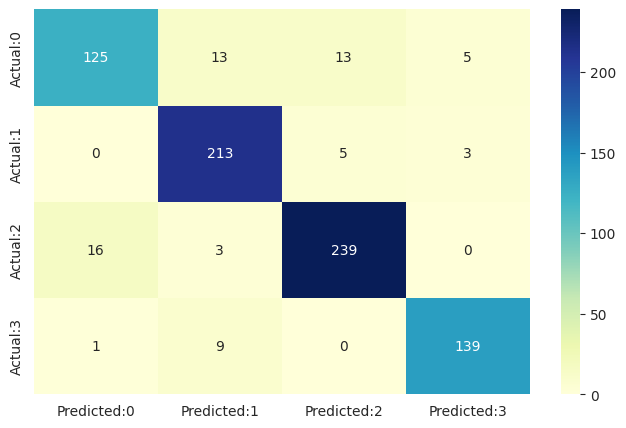

In [ ]:
# Confusion Matrix of Random Forest Model
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2', 'Predicted:3'],index=['Actual:0','Actual:1','Actual:2', 'Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

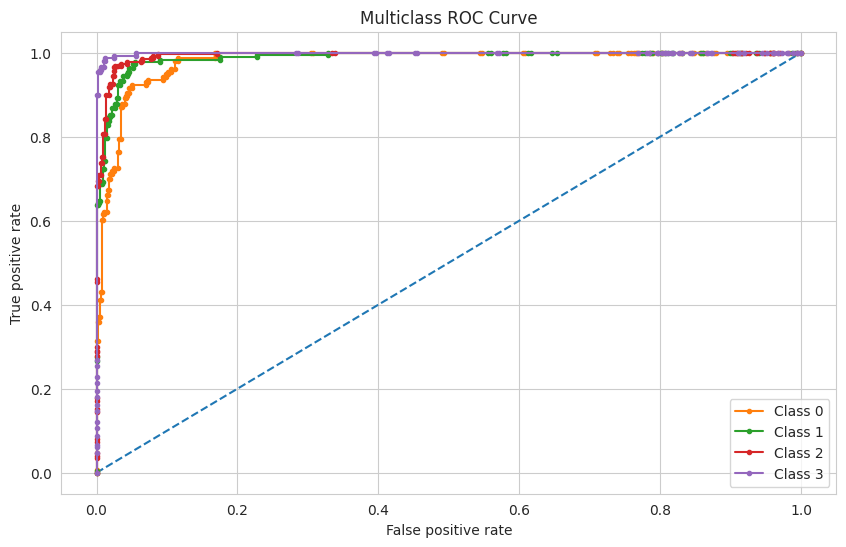

In [ ]:
# ROC curve and AUC
from sklearn.preprocessing import label_binarize

# Convert the true labels to binary format (OvR strategy)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Calculate predicted probabilities for each class using predict_proba
probs_2 = RFC.predict_proba(X_test)

# Calculate AUC for each class
log_auc = []
for i in range(n_classes):
    log_auc.append(roc_auc_score(y_test_binarized[:, i], probs_2[:, i]))

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], probs_2[:, i])

# Plot ROC curves for each class
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label=f'Class {i}')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

In [ ]:
#roc auc score
roc_auc_score(y_test, probs_2, multi_class='ovr', average='weighted')

0.990882481735244

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# search for optimun parameters using gridsearch
params_rf = {
      'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]
  }

random_clf = GridSearchCV(RandomForestClassifier(random_state=0),param_grid=params_rf,cv=5, scoring='roc_auc')

In [ ]:
# Fit the Algorithm.
random_clf.fit(X_train,y_train)

random_clf.best_params_

{'max_depth': 7, 'n_estimators': 150}

In [ ]:
# Predict on test data.
random_predict = random_clf.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', random_clf.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ',  random_clf.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9901147959183674
Test ROC-AUC score :  0.9553571428571429


In [ ]:
## Accuracy of Random Forest model with CV and Hyperparameter tuning.
RFC_accuracy = accuracy_score(y_test,random_predict)
print(f"Using Random Forest with GridsearchCV we get an accuracy of {round(RFC_accuracy*100,2)}%")

Using Random Forest with GridsearchCV we get an accuracy of 95.54%


In [ ]:
# Classification Report after Hyperparameter Tuning.
print(classification_report(y_test,random_predict))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       156
           1       0.94      0.98      0.96       221
           2       0.96      0.97      0.96       258
           3       0.99      0.95      0.97       149

    accuracy                           0.96       784
   macro avg       0.96      0.95      0.95       784
weighted avg       0.96      0.96      0.96       784



<Axes: >

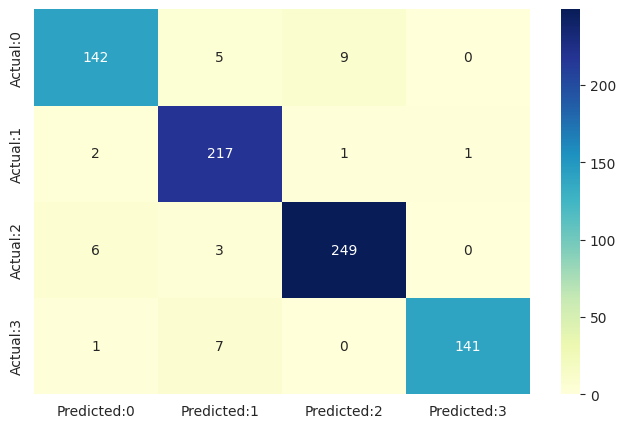

In [ ]:
# Confusion Matrix of Random Forest Model After Hyperparameter Tuning.
cm=confusion_matrix(y_test,random_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2', 'Predicted:3'],index=['Actual:0','Actual:1','Actual:2', 'Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

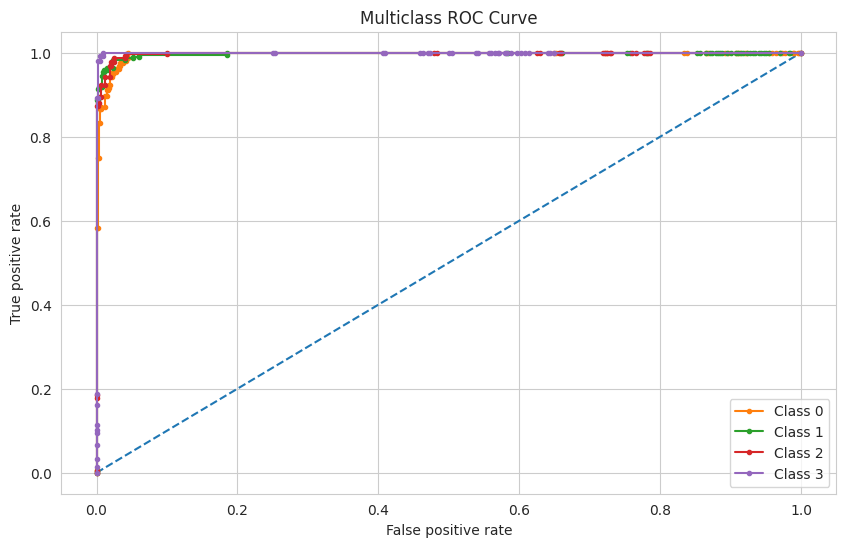

In [ ]:
# ROC curve and AUC
from sklearn.preprocessing import label_binarize

# Convert the true labels to binary format (OvR strategy)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Calculate predicted probabilities for each class using predict_proba
probs_3 = random_clf.predict_proba(X_test)

# Calculate AUC for each class
log_auc = []
for i in range(n_classes):
    log_auc.append(roc_auc_score(y_test_binarized[:, i], probs_3[:, i]))

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], probs_3[:, i])

# Plot ROC curves for each class
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label=f'Class {i}')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

In [ ]:
#roc auc score
roc_auc_score(y_test, probs_3, multi_class='ovr', average='weighted')

0.9978227420797499

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique because it exhaustively searches all possible combinations of hyperparameters and returns the most optimal results.By evaluating the performance of each combination, GridSearchCV is able to select the best value for each hyperparameter, leading to more accurate model tuning. This approach provides a thorough and reliable method for optimizing hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyperparamater tuning of Random Forest model there is a significant improvement in model performance as testing accuracy increases to 91.33% from 95.54% having best params_ as:{'max_depth': 7, 'n_estimators': 150}.Other Evaluation metrics like precision, recall, F1 score also improved with respect to each cluster and curvature of ROC curve for each cluster also improved, showing maximum catch of data points from each cluster. ROC_AUC Score has also improved from 99% to 99.7%.

### ML Model - 4- XG BOOST

In [ ]:
# ML Model - 4 Implementation
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=300,max_depth=1,n_jobs=-1,random_state=0)
# Fit the model to your data
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (eXtreme Gradient Boosting) is an advanced machine learning algorithm that belongs to the gradient boosting family. It is widely used for regression and classification tasks and has gained popularity for its high performance and scalability.The key idea behind XGBoost is to iteratively build an ensemble of weak prediction models, typically decision trees, and combine their predictions to create a strong predictive model. The algorithm optimizes a specific objective function by minimizing the loss during each boosting iteration.

*XGBoost is designed to be highly efficient and scalable, making it suitable for large datasets and complex problems.*

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', xgb.score(X_train,y_train))
print('Test ROC-AUC score : ',  xgb.score(X_test,y_test))

Train ROC-AUC score :  0.9942602040816326
Test ROC-AUC score :  0.9732142857142857


In [ ]:
# Accuracy of XGBOOST model.
xgb_accuracy = accuracy_score(y_test,y_pred)
print(f"Using XG BOOST we get an accuracy of {round(xgb_accuracy*100,2)}%")

Using XG BOOST we get an accuracy of 97.32%


In [ ]:
# Classification Report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       156
           1       0.97      0.97      0.97       221
           2       0.97      0.98      0.98       258
           3       0.97      0.99      0.98       149

    accuracy                           0.97       784
   macro avg       0.97      0.97      0.97       784
weighted avg       0.97      0.97      0.97       784



<Axes: >

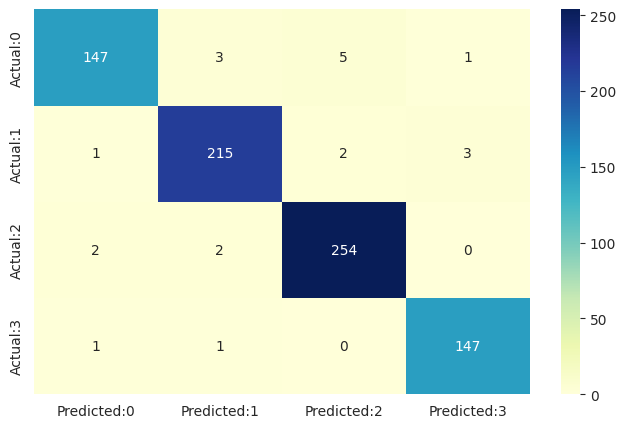

In [ ]:
# Confusion Matrix.
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2', 'Predicted:3'],index=['Actual:0','Actual:1','Actual:2', 'Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

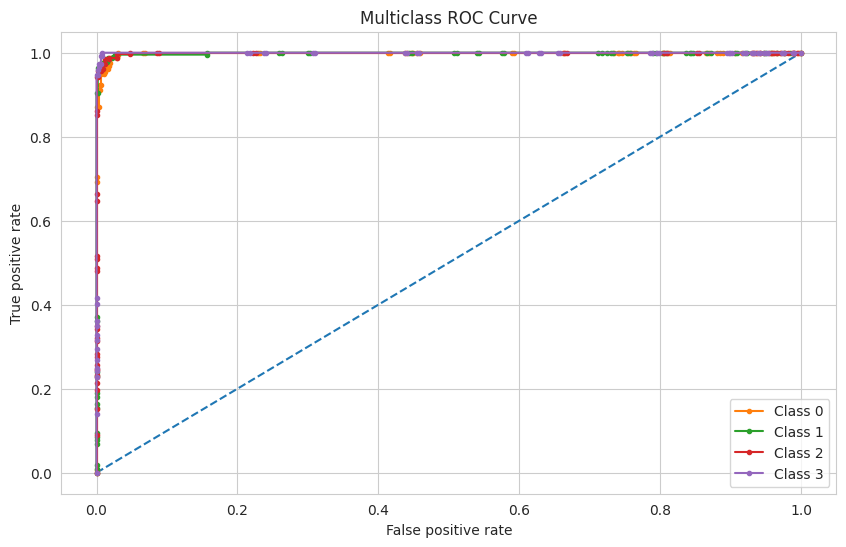

In [ ]:
# ROC curve and AUC
from sklearn.preprocessing import label_binarize

# Convert the true labels to binary format (OvR strategy)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Calculate predicted probabilities for each class using predict_proba
probs_4 = xgb.predict_proba(X_test)

# Calculate AUC for each class
log_auc = []
for i in range(n_classes):
    log_auc.append(roc_auc_score(y_test_binarized[:, i], probs_4[:, i]))

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], probs_4[:, i])

# Plot ROC curves for each class
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label=f'Class {i}')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

In [ ]:
#roc auc score
roc_auc_score(y_test, probs_4, multi_class='ovr', average='weighted')

0.9990797171424635

#### 2. Cross- Validation & Hyperparameter Tuning.

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
 # ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBClassifier
params_xgb = {
     'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4,5,6],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]
  }

xgb_clf = GridSearchCV(XGBClassifier(), param_grid = params_xgb, cv = 3, scoring='roc_auc',n_jobs=5,verbose=True)

In [ ]:
# Fit the Algorithm.
xgb_clf.fit(X_train,y_train)
xgb_clf.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[16:53:12] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [ ]:
# Predict on Test data.
xgb_predict = xgb_clf.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', xgb_clf.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ',  xgb_clf.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9977678571428571
Test ROC-AUC score :  0.9681122448979592


In [ ]:
# Accuracy of XGBOOST model after Hyperparameter tuning.
xgb_accuracy = accuracy_score(y_test,xgb_predict)
print(f"Using XG BOOST with GridsearchCV we get an accuracy of {round(xgb_accuracy*100,2)}%")

Using XG BOOST with GridsearchCV we get an accuracy of 96.81%


In [ ]:
# Classification Report.
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       156
           1       0.97      0.98      0.98       221
           2       0.96      0.97      0.97       258
           3       0.98      0.99      0.98       149

    accuracy                           0.97       784
   macro avg       0.97      0.97      0.97       784
weighted avg       0.97      0.97      0.97       784



<Axes: >

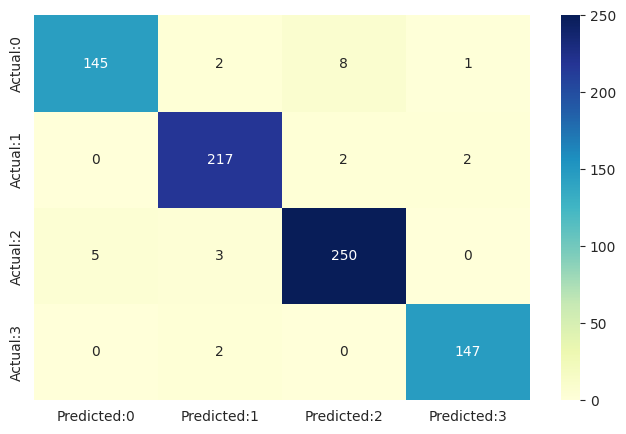

In [ ]:
cm=confusion_matrix(y_test,xgb_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2', 'Predicted:3'],index=['Actual:0','Actual:1','Actual:2', 'Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

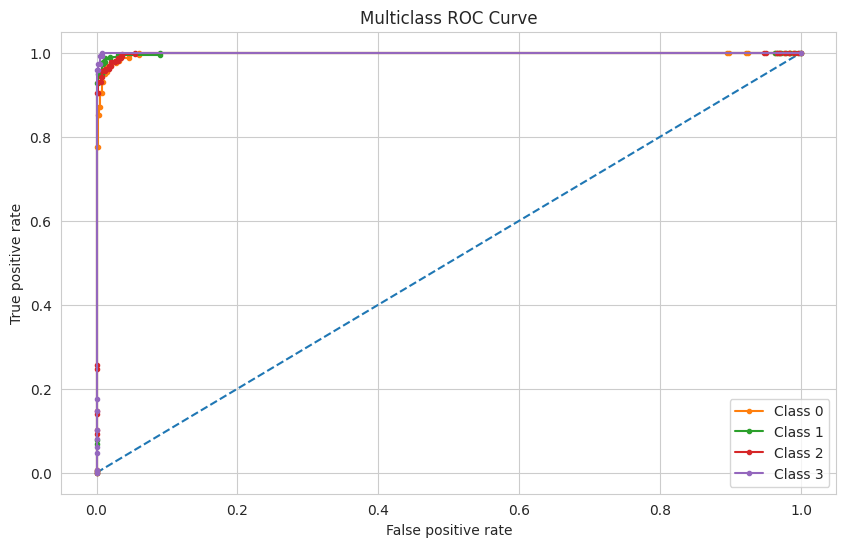

In [ ]:
# ROC curve and AUC
from sklearn.preprocessing import label_binarize

# Convert the true labels to binary format (OvR strategy)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Calculate predicted probabilities for each class using predict_proba
probs_5 = xgb_clf.predict_proba(X_test)

# Calculate AUC for each class
log_auc = []
for i in range(n_classes):
    log_auc.append(roc_auc_score(y_test_binarized[:, i], probs_5[:, i]))

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], probs_5[:, i])

# Plot ROC curves for each class
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label=f'Class {i}')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

In [ ]:
#roc auc score
roc_auc_score(y_test, probs_5, multi_class='ovr', average='weighted')

0.998793813290104

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique because it exhaustively searches all possible combinations of hyperparameters and returns the most optimal results.By evaluating the performance of each combination, GridSearchCV is able to select the best value for each hyperparameter, leading to more accurate model tuning. This approach provides a thorough and reliable method for optimizing hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyperparameter Tuning of XG BOOST Model we have found that there is no significant improvement in model as compare to untuned model, all the evaluation metrics of untuned and tuned model are approximately same, it means that the default hyperparameters which is set to untuned model are the optimized ones resulting in best evaluation metrics among all the models.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

*Summary of Applied Models:*

In [ ]:
# Initiating Function to Summarize all Applied Model.
def create_evaluation_dataframe(models_without_cv, models_with_cv):
    # Create DataFrame for models without cross-validation and hyperparameter tuning
    df_without_cv = pd.DataFrame(models_without_cv)

    # Create DataFrame for models with cross-validation and hyperparameter tuning
    df_with_cv = pd.DataFrame(models_with_cv)

    return df_without_cv, df_with_cv

In [ ]:
# Applying above created Function to Summarize Model evaluation metrics.
models_without_cv = {
    'Logistic_Regression': {'Accuracy': 0.69, 'Train ROC-AUC score': 0.7066, 'Test ROC-AUC score': 0.6926,'prob_pred_ROC-AUC score':0.8850467527443674},
    'Random_Forest': {'Accuracy': 0.91, 'Train ROC-AUC score': 0.9314, 'Test ROC-AUC score': 0.9132,'prob_pred_ROC-AUC score':0.990882481735244},
    'XG BOOST': {'Accuracy': 0.97, 'Train ROC-AUC score': 0.9942, 'Test ROC-AUC score': 0.9732,'prob_pred_ROC-AUC score':0.9990797171424635}
}

models_with_cv = {
    'Logistic_Regression': {'Accuracy': 0.86, 'Train ROC-AUC score': 0.8616, 'Test ROC-AUC score': 0.8571,'prob_pred_ROC-AUC score':0.9680591058416932},
    'Random_Forest': {'Accuracy': 0.96, 'Train ROC-AUC score': 0.9901, 'Test ROC-AUC score': 0.9553,'prob_pred_ROC-AUC score':0.9978227420797499},
    'XG BOOST': {'Accuracy': 0.97, 'Train ROC-AUC score': 0.9977, 'Test ROC-AUC score': 0.9681,'prob_pred_ROC-AUC score':0.998793813290104}
}

In [ ]:
df_without_cv, df_with_cv = create_evaluation_dataframe(models_without_cv, models_with_cv)
print("Dataframe for models without cross-validation and hyperparameter tuning:")
print(df_without_cv)

print("\nDataframe for models with cross-validation and hyperparameter tuning:")
print(df_with_cv)

Dataframe for models without cross-validation and hyperparameter tuning:
                         Logistic_Regression  Random_Forest  XG BOOST
Accuracy                            0.690000       0.910000   0.97000
Train ROC-AUC score                 0.706600       0.931400   0.99420
Test ROC-AUC score                  0.692600       0.913200   0.97320
prob_pred_ROC-AUC score             0.885047       0.990882   0.99908

Dataframe for models with cross-validation and hyperparameter tuning:
                         Logistic_Regression  Random_Forest  XG BOOST
Accuracy                            0.860000       0.960000  0.970000
Train ROC-AUC score                 0.861600       0.990100  0.997700
Test ROC-AUC score                  0.857100       0.955300  0.968100
prob_pred_ROC-AUC score             0.968059       0.997823  0.998794


After Precise observation I have choose *Accuracy, prob_pred_ROC_AUC score, Precision, recall, F1 score* as the evaluation metrics which explains the model performance very well and help to choose the best model among all which have a positive impact on business.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluation of each and every model I choose to go with **XGBOOST(untuned model)** as our target is to maximize the segregation of data points to its respective cluster and **XGBOOST** done it with an accuracy of 97%.

Our model has successfully achieved the highest **precision** and **recall** among all the models showing balance between precision and recall by attaining a marginal difference in **F1 SCORE** for all clusters. Model also gains **AUC-ROC score** of 99.9% which means our model has very discriminative power to distinguish between the clusters.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) combines the power of multiple simple models, such as decision trees, to create a masterful and accurate prediction model. It's the perfect tool for tackling large datasets and can train a sequence of models that learn from each other's mistakes. In other words, XGBoost is a true master of boosting, where each tree is trained to correct the errors of the previous trees and create a more accurate and robust model.

XGBoost is the wizard of the machine learning world, harnessing the power of gradient boosting to optimize tree parameters and minimize loss. But that's not all - XGBoost also comes packed with some pretty nifty features, including regularization to protect against overfitting, and parallel processing to speed up the training process.

In [ ]:
# Fit the XGBOOST model.
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

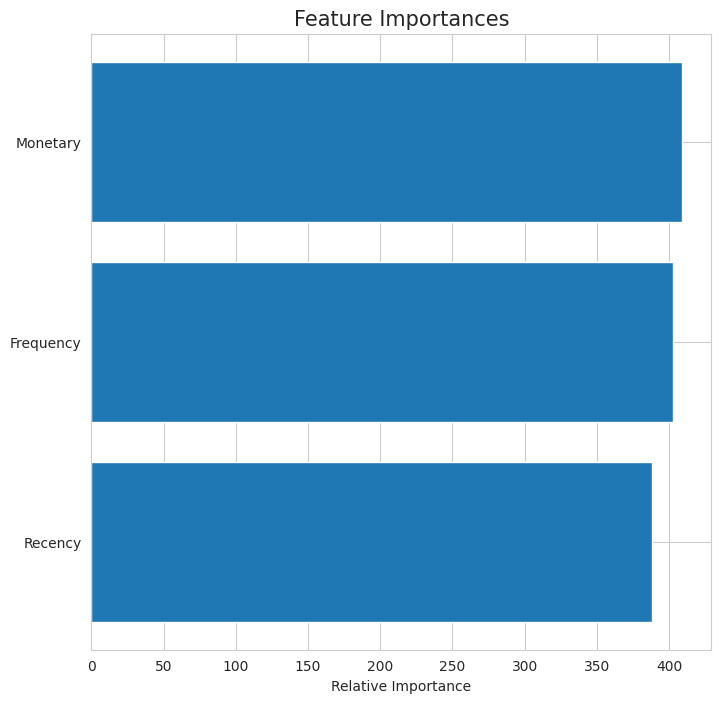

In [ ]:
# Define the feature importances and sort them in ascending order.
# Get the feature importances using the XGBoost Booster object.
importance_dict = xgb.get_booster().get_score(importance_type='weight')

# Sort the feature importances in descending order
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the feature indices and importances
feature_indices, importances = zip(*sorted_importances)

# Map the feature indices to their names from df_new
feature_names = [df_new.columns[int(idx[1:])] for idx in feature_indices]

# Set the figure size and title
plt.figure(figsize=(8, 8))
plt.title('Feature Importances', fontsize=15)

# Create the horizontal bar chart
plt.barh(range(len(importances)), importances, align='center', zorder=2)

# Set the y-axis tick labels to the feature names and invert the y-axis
plt.yticks(range(len(importances)), feature_names)
plt.gca().invert_yaxis()

# Set the x-axis label and enable grid lines
plt.xlabel('Relative Importance')
plt.grid(axis='x', zorder=0)

# Show the plot
plt.show()

Although XGBoost has emerged as the champion of accuracy in our model selection process, we cannot ignore the fact that it is often considered a "black box" due to its complex nature. Our stakeholders, who are keen on understanding the underlying reasoning behind the model's predictions, would not be satisfied with a mere numerical accuracy metric. Therefore, in order to foster their trust and provide them with a more transparent and insightful interpretation of the model's behavior, we have crafted a visually-appealing bar plot showcasing the decreasing sequence of feature importance. By doing so, we hope to empower our stakeholders with a deeper understanding of the model's decision-making process and the key factors that influence its predictions.

**Feature 'Monetary' is the most influential feature among all followed by 'Frequency' and 'Recency',making our model the best model(XGBOOST) by enhancing model performance and its predictions.**



# **Conclusion**

**Insights From Exploratory Data Analysis:**



* CustomerID 14646 has the highest purchasing power followed by customerID 18102 and customerID 17450.These are among the top 3 with respect to purchasing power.
* CustomerID 14646 has purchased the highest Quantity of products followed by customerID 16446 and customerID 12415. These are among the top 3 with respect to purchasing regarding Quantitywise.

* Customers are categorized as Bronze, Silver, Gold, and Platinum category which shows their loyalty towards the retail store as per the Quantity purchased by them. Bronze being the top most catergory among all having 57.8% of customers followed by silver(17.4%), gold(13.8%) and Platinum(11%) respectively.
* United Kingdom has emerged the highest revenue generating country with revenue of 7.28M pounds and Saudi Arabia is the least revenue genarating country with revenue of 145.92 pounds only.

* United Kingdom has emerged the highest Quantity purchased country with Quantity of 4.24M products and Saudi Arabia is the least Quantity purchased country with Quantity of 80 products only.
* Product Description WHITE HANGING HEART T-LIGHT  has the highest frequency of
occurrence in data[i.e. 2016 times] which means it is the most preferred product by customers.


* Highest Revenue genrating product is PAPER CRAFT, LITTLE BIRDIE.
* Most of transactions are made in Afternoon TimePeriod which have a frequency of 231998 times.


* According to the Month, most of the transactions are made in the month of November and according to weekday, most of the transactions are made on Thursday.

**Conclusion Drawn From ML Models:**

*Clustering Analysis(K-Means)*

**1. Three Clusters (Customer Segments):**

Carefully examining the three cluster classification, I observe following groups of customers:



* **High value customer:**
'Cluster 0' is the high value customer segment for the online retails store as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently





* **Medium value customer:** 'Cluster 2' appears to be the medium valued customer segment. These customers place an order of a considerable amount, though not as much as high valued customers, but still quite higher than low valued customers. Also, their orders are relatively more frequent than the lowest value segment.

* **Low value customer:** It is quite evident that 'Cluster 1' has customers who rarely shop and when they order, their orders are pretty low valued. Apart from the numbers, the visualization of clusters in Silhoutte Analysis show that all three customer segments are quite distinct with very less overlapp between them. The general trend resonated in these 3 clusters is that high monetary value is correlated with high frequency of orders and more recent ones.

**2. Four Clusters (Customer Segments):**

Carefully examining the four cluster classification, I observe following groups of customers:



* **Overall high valued customers:** 'Cluster 3' is the typical high value customer who has shopped recently and shops regularly for high value orders.

* **High monetary value but less frequent:** 'Cluster 1' represents a peculiar customer segment who place quite a high valued order but do not do so frequently or have not done much recently. But, these customers do hold a lot of promise if targeted to improve sales.

* **Medium value customers:** The customers from 'Cluster 0' have recently placed medium valued orders but do not do so frequently.

* **Low value customers:** 'Cluster 2' is the segment of customers who have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values.

**3. Five Clusters (Customer Segments):**

Carefully examining the five cluster classification, I observe following groups of customers:



* **Overall high valued customers:** 'Cluster 3' is the typical high value customer who has shopped recently and shops regularly for high value orders.

* **High monetary value but less frequent:** 'Cluster 0' represents a peculiar customer segment who place quite a high valued order but do not do so frequently or have not done much recently. But, these customers do hold a lot of promise if targeted to improve sales.

* **Medium value - low frequency - recent customers:** The customers from 'Cluster 4' have recently placed medium valued orders but do not do so frequently.

* **Medium value - low frequency - older customers:** The customers from 'Cluster 2' happen to place medium valued orders quite a long time ago and they do not do so frequently.
*  **Low valued customers:** 'Cluster 1' is the segment of customers who have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values. The visualization of clusters in Silhoutte Analysis show some overlapp between the customer segments. However, the dataset does not distinguish between wholesale and retail customers, it is quite likely that high value frequent clients are the wholesale dealers and medium/ low valued ones are individual retail purchasers.

 *Based on clustering analysis, silhouette score and elbow curve I have came up with the optimal number of clusters as '4'.*

 **Clustering Based Modelling:**



* I have clubbed the optimal cluster label to Recency, Frequency and Monetary dataframe for applying classification models.
* I have implemented a total of three classification machine learning models in our analysis, which are Logistic Regression, Random Forest, XGBoost.

* Accuracy and AUC_ROC Score has been chosen as the model evaluation metric  according to our target problem.
* After evaluating various metrics such as recall, precision, F1 score, accuracy, and AUC-ROC Score, XGBoost(untuned) has been considered as our final optimal model since it achieved the highest scores for all these metrics.

* According to our analysis, Monetary is the most contributing feature followed by frequency and recency,towards making predictions for our selected model.
* During our analysis, no overfitting was observed in any of the models. This indicates that the models were able to generalize well to new, unseen data, and were not solely relying on the training data to make accurate predictions. This is an important aspect of model evaluation, as overfitting can lead to poor performance on new data and limit the model's ability to be useful in real-world scenarios.

















































### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***